In [6]:
%load_ext autoreload
%autoreload 2
import dgl
import torch
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 1. Carga y Configuración Inicial

In [2]:
%load_ext autoreload
%autoreload 2

import os
import dgl
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuración de impresión
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Librerías importadas correctamente")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✓ Librerías importadas correctamente


In [ ]:
# Ruta al grafo DGL
# ---------------------
GRAPH_PATH = '/media/valentina/KINGSTON/TESIS/data/dgl_graph/2024/peeringdb/'

✓ Ruta encontrada: /media/valentina/KINGSTON/TESIS/data/dgl_graph/2024/peeringdb/
  Archivos disponibles: ['meta.yaml', 'edges.csv', 'nodes.csv', 'graphs.csv', 'graphs_2024']


In [35]:
# Cargar el grafo DGL
try:
    dgl_graph = dgl.data.CSVDataset(GRAPH_PATH, force_reload=True)
    g = dgl_graph[0]  # Primer grafo de la lista
    print("✓ Grafo cargado desde graph.bin")
except:
    print("✗ Error al cargar el grafo. Verifica el formato del archivo.")
    g = None

if g is not None:
    print(f"\nGrafo cargado exitosamente:")
    print(g)

Done saving data into cached files.
✓ Grafo cargado desde graph.bin

Grafo cargado exitosamente:
Graph(num_nodes=41423, num_edges=3332036,
      ndata_schemes={'feat': Scheme(shape=(68,), dtype=torch.float32)}
      edata_schemes={})


## 2. Estadísticas Básicas del Grafo

In [36]:
if g is not None:
    # Información básica
    num_nodes = g.num_nodes()
    num_edges = g.num_edges()
    
    print("=" * 70)
    print("ESTADÍSTICAS BÁSICAS DEL GRAFO")
    print("=" * 70)
    print(f"\n📊 Estructura:")
    print(f"   • Número de nodos (ASes): {num_nodes:,}")
    print(f"   • Número de aristas: {num_edges:,}")
    print(f"   • Tipo de grafo: {'Dirigido' if g.is_multigraph == False else 'Multi-grafo'}")
    
    # Densidad del grafo
    max_edges = num_nodes * (num_nodes - 1)  # para grafo dirigido
    density = num_edges / max_edges if max_edges > 0 else 0
    print(f"   • Densidad del grafo: {density:.6f}")
    print(f"   • Aristas posibles: {max_edges:,}")
    print(f"   • Porcentaje de conexión: {(density * 100):.4f}%")
    
    # Grados
    in_degrees = g.in_degrees().numpy()
    out_degrees = g.out_degrees().numpy()
    
    print(f"\n📈 Estadísticas de Grado:")
    print(f"   Grado de entrada:")
    print(f"      - Promedio: {in_degrees.mean():.2f}")
    print(f"      - Mediana: {np.median(in_degrees):.2f}")
    print(f"      - Mínimo: {in_degrees.min()}")
    print(f"      - Máximo: {in_degrees.max()}")
    print(f"      - Desviación estándar: {in_degrees.std():.2f}")
    
    print(f"   Grado de salida:")
    print(f"      - Promedio: {out_degrees.mean():.2f}")
    print(f"      - Mediana: {np.median(out_degrees):.2f}")
    print(f"      - Mínimo: {out_degrees.min()}")
    print(f"      - Máximo: {out_degrees.max()}")
    print(f"      - Desviación estándar: {out_degrees.std():.2f}")
    
    # Nodos aislados
    isolated_nodes = ((in_degrees == 0) & (out_degrees == 0)).sum()
    print(f"\n🔍 Conectividad:")
    print(f"   • Nodos aislados: {isolated_nodes} ({(isolated_nodes/num_nodes*100):.2f}%)")
    print(f"   • Nodos con al menos una conexión: {num_nodes - isolated_nodes} ({((num_nodes-isolated_nodes)/num_nodes*100):.2f}%)")

ESTADÍSTICAS BÁSICAS DEL GRAFO

📊 Estructura:
   • Número de nodos (ASes): 41,423
   • Número de aristas: 3,332,036
   • Tipo de grafo: Multi-grafo
   • Densidad del grafo: 0.001942
   • Aristas posibles: 1,715,823,506
   • Porcentaje de conexión: 0.1942%

📈 Estadísticas de Grado:
   Grado de entrada:
      - Promedio: 80.44
      - Mediana: 19.00
      - Mínimo: 0
      - Máximo: 171198
      - Desviación estándar: 1656.10
   Grado de salida:
      - Promedio: 80.44
      - Mediana: 0.00
      - Mínimo: 0
      - Máximo: 171150
      - Desviación estándar: 1729.31

🔍 Conectividad:
   • Nodos aislados: 0 (0.00%)
   • Nodos con al menos una conexión: 41423 (100.00%)


## 3. Análisis de Atributos de Nodos

In [37]:
if g is not None:
    print("=" * 70)
    print("ATRIBUTOS DE NODOS")
    print("=" * 70)
    
    # Listar todos los atributos disponibles
    node_attrs = g.ndata.keys()
    print(f"\n📋 Atributos disponibles: {list(node_attrs)}")
    
    # Analizar cada atributo
    for attr_name in node_attrs:
        attr_data = g.ndata[attr_name]
        print(f"\n🔹 {attr_name}:")
        print(f"   • Tipo: {attr_data.dtype}")
        print(f"   • Shape: {attr_data.shape}")
        
        if len(attr_data.shape) == 1:  # Atributo escalar
            print(f"   • Valores únicos: {len(torch.unique(attr_data))}")
            if attr_data.dtype in [torch.float32, torch.float64]:
                print(f"   • Min: {attr_data.min().item():.4f}")
                print(f"   • Max: {attr_data.max().item():.4f}")
                print(f"   • Media: {attr_data.float().mean().item():.4f}")
                print(f"   • Std: {attr_data.float().std().item():.4f}")
        else:  # Atributo vectorial (features)
            print(f"   • Dimensionalidad: {attr_data.shape[1]}")
            print(f"   • Rango de valores: [{attr_data.min().item():.4f}, {attr_data.max().item():.4f}]")

ATRIBUTOS DE NODOS

📋 Atributos disponibles: ['feat']

🔹 feat:
   • Tipo: torch.float32
   • Shape: torch.Size([41423, 68])
   • Dimensionalidad: 68
   • Rango de valores: [0.0000, 1.0000]


In [38]:
# Si existe el atributo 'feat', analizar en detalle
if g is not None and 'feat' in g.ndata:
    features = g.ndata['feat'].numpy()
    
    print("\n" + "=" * 70)
    print("ANÁLISIS DETALLADO DE FEATURES")
    print("=" * 70)
    
    print(f"\n📊 Dimensiones: {features.shape}")
    print(f"   • {features.shape[0]} nodos")
    print(f"   • {features.shape[1]} características por nodo")
    
    # Estadísticas por dimensión
    print(f"\n📈 Estadísticas por dimensión de feature:")
    for i in range(min(10, features.shape[1])):  # Mostrar solo primeras 10
        feat_dim = features[:, i]
        print(f"   Dim {i}: μ={feat_dim.mean():.4f}, σ={feat_dim.std():.4f}, "
              f"min={feat_dim.min():.4f}, max={feat_dim.max():.4f}")
    
    if features.shape[1] > 10:
        print(f"   ... ({features.shape[1] - 10} dimensiones más)")
    
    # Verificar normalización
    is_normalized = np.allclose(features.mean(axis=0), 0, atol=0.1) and \
                    np.allclose(features.std(axis=0), 1, atol=0.2)
    print(f"\n✓ Features {'parecen estar' if is_normalized else 'NO están'} normalizadas")


ANÁLISIS DETALLADO DE FEATURES

📊 Dimensiones: (41423, 68)
   • 41423 nodos
   • 68 características por nodo

📈 Estadísticas por dimensión de feature:
   Dim 0: μ=0.0407, σ=0.0961, min=0.0000, max=1.0000
   Dim 1: μ=0.0328, σ=0.0874, min=0.0000, max=1.0000
   Dim 2: μ=0.0629, σ=0.1399, min=0.0000, max=1.0000
   Dim 3: μ=0.0446, σ=0.1216, min=0.0000, max=0.9956
   Dim 4: μ=0.0750, σ=0.2634, min=0.0000, max=1.0000
   Dim 5: μ=0.0186, σ=0.1352, min=0.0000, max=1.0000
   Dim 6: μ=0.0087, σ=0.0927, min=0.0000, max=1.0000
   Dim 7: μ=0.0788, σ=0.2695, min=0.0000, max=1.0000
   Dim 8: μ=0.0256, σ=0.1580, min=0.0000, max=1.0000
   Dim 9: μ=0.0885, σ=0.2840, min=0.0000, max=1.0000
   ... (58 dimensiones más)

✓ Features NO están normalizadas


## 4. Distribución de Grados

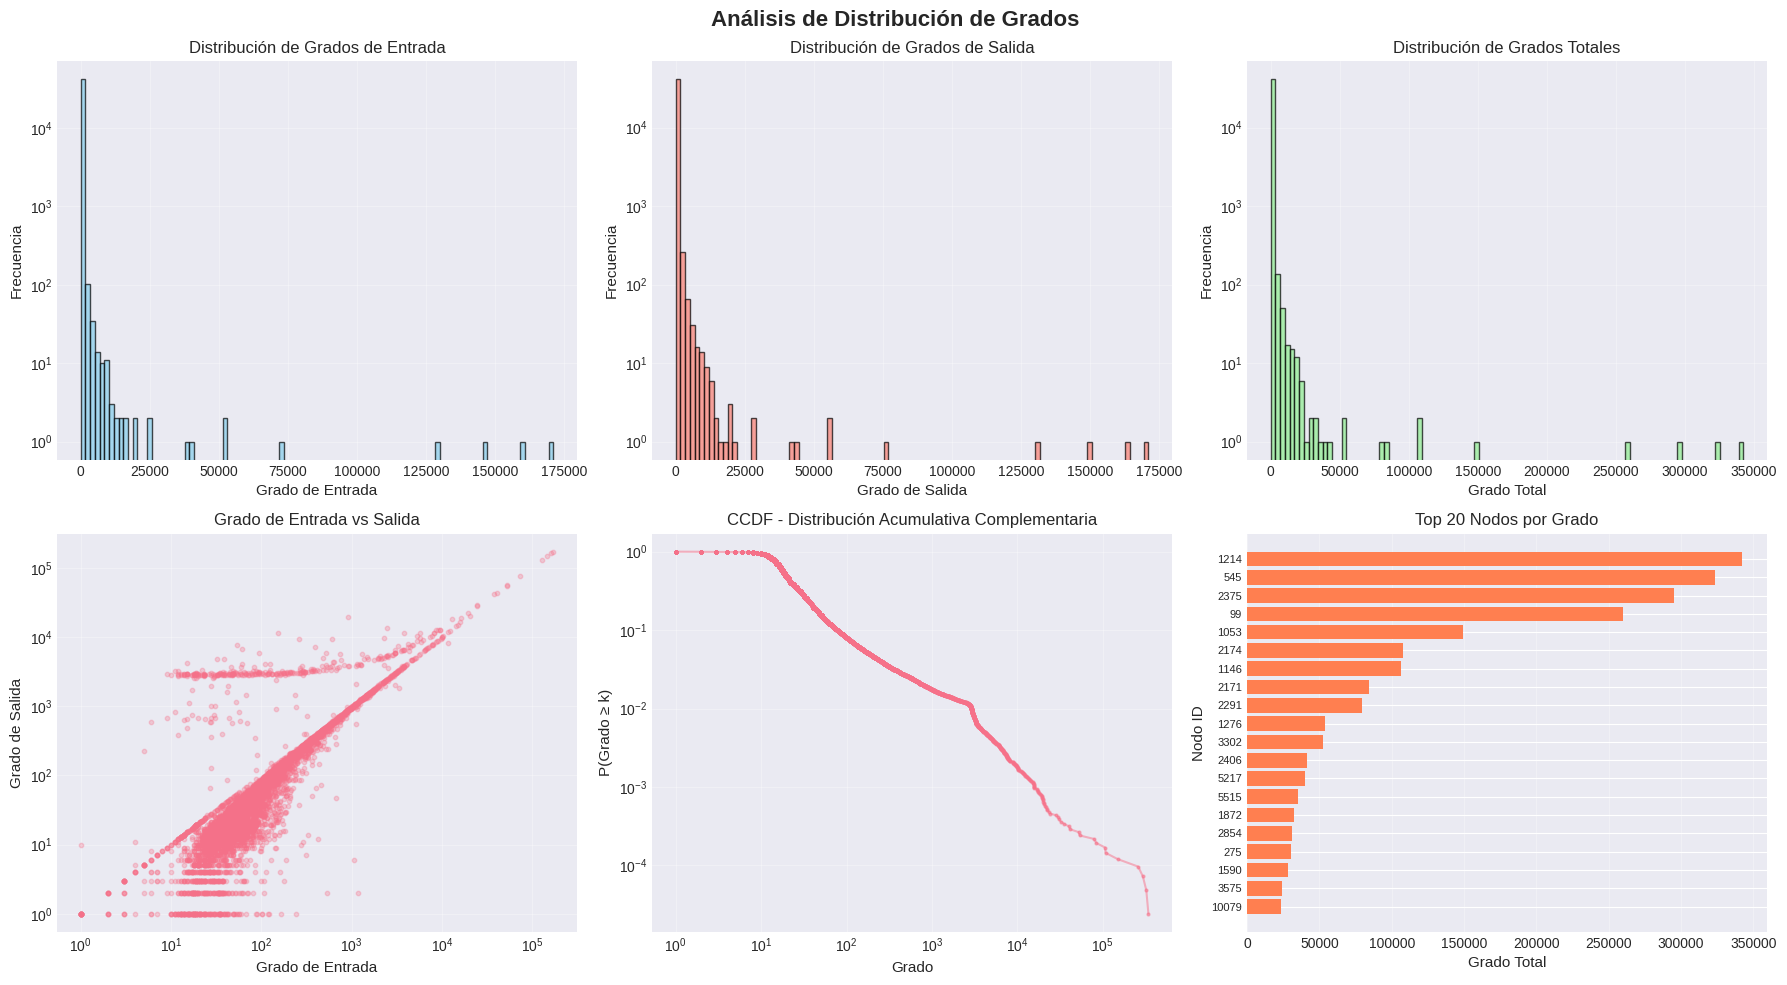


📊 Top 10 Nodos con Mayor Grado Total:
    1. Nodo   1214: in=171198, out=171150, total=342348
    2. Nodo    545: in=160193, out=163065, total=323258
    3. Nodo   2375: in=145904, out=148932, total=294836
    4. Nodo     99: in=128710, out=131362, total=260072
    5. Nodo   1053: in=72560, out=76378, total=148938
    6. Nodo   2174: in=52017, out=55781, total=107798
    7. Nodo   1146: in=51756, out=54959, total=106715
    8. Nodo   2171: in=40394, out=43636, total=84030
    9. Nodo   2291: in=38070, out=41327, total=79397
   10. Nodo   1276: in=24625, out=28942, total=53567


In [39]:
if g is not None:
    in_degrees = g.in_degrees().numpy()
    out_degrees = g.out_degrees().numpy()
    total_degrees = in_degrees + out_degrees
    
    # Crear figura con múltiples subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Análisis de Distribución de Grados', fontsize=16, fontweight='bold')
    
    # 1. Histograma de grados de entrada
    axes[0, 0].hist(in_degrees, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Grado de Entrada', fontsize=11)
    axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
    axes[0, 0].set_title('Distribución de Grados de Entrada', fontsize=12)
    axes[0, 0].set_yscale('log')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Histograma de grados de salida
    axes[0, 1].hist(out_degrees, bins=100, color='salmon', edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Grado de Salida', fontsize=11)
    axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
    axes[0, 1].set_title('Distribución de Grados de Salida', fontsize=12)
    axes[0, 1].set_yscale('log')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Histograma de grados totales
    axes[0, 2].hist(total_degrees, bins=100, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0, 2].set_xlabel('Grado Total', fontsize=11)
    axes[0, 2].set_ylabel('Frecuencia', fontsize=11)
    axes[0, 2].set_title('Distribución de Grados Totales', fontsize=12)
    axes[0, 2].set_yscale('log')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Scatter: in-degree vs out-degree
    axes[1, 0].scatter(in_degrees, out_degrees, alpha=0.3, s=10)
    axes[1, 0].set_xlabel('Grado de Entrada', fontsize=11)
    axes[1, 0].set_ylabel('Grado de Salida', fontsize=11)
    axes[1, 0].set_title('Grado de Entrada vs Salida', fontsize=12)
    axes[1, 0].set_xscale('log')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. CCDF (Complementary Cumulative Distribution Function)
    sorted_degrees = np.sort(total_degrees)[::-1]
    ccdf = np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)
    axes[1, 1].loglog(sorted_degrees, ccdf, 'o-', markersize=2, alpha=0.5)
    axes[1, 1].set_xlabel('Grado', fontsize=11)
    axes[1, 1].set_ylabel('P(Grado ≥ k)', fontsize=11)
    axes[1, 1].set_title('CCDF - Distribución Acumulativa Complementaria', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Top 20 nodos por grado
    top_20_idx = np.argsort(total_degrees)[-20:]
    axes[1, 2].barh(range(20), total_degrees[top_20_idx], color='coral')
    axes[1, 2].set_xlabel('Grado Total', fontsize=11)
    axes[1, 2].set_ylabel('Nodo ID', fontsize=11)
    axes[1, 2].set_title('Top 20 Nodos por Grado', fontsize=12)
    axes[1, 2].set_yticks(range(20))
    axes[1, 2].set_yticklabels(top_20_idx, fontsize=8)
    axes[1, 2].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir top 10 nodos
    print("\n📊 Top 10 Nodos con Mayor Grado Total:")
    top_10 = np.argsort(total_degrees)[-10:][::-1]
    for rank, node_id in enumerate(top_10, 1):
        print(f"   {rank:2d}. Nodo {node_id:6d}: in={in_degrees[node_id]:4d}, "
              f"out={out_degrees[node_id]:4d}, total={total_degrees[node_id]:4d}")

## 5. Análisis de Conectividad y Componentes

In [40]:
if g is not None:
    print("=" * 70)
    print("ANÁLISIS DE COMPONENTES CONECTADOS")
    print("=" * 70)
    
    # Convertir a NetworkX para análisis de conectividad
    print("\n⏳ Convirtiendo a NetworkX...")
    nx_g = g.to_networkx().to_undirected()
    print("✓ Conversión completada")
    
    # Componentes débilmente conectados
    print("\n🔍 Analizando componentes conectados...")
    components = list(nx.connected_components(nx_g))
    num_components = len(components)
    component_sizes = [len(c) for c in components]
    largest_component_size = max(component_sizes)
    
    print(f"\n📊 Resultados:")
    print(f"   • Número de componentes: {num_components}")
    print(f"   • Tamaño del componente más grande: {largest_component_size} nodos "
          f"({largest_component_size/g.num_nodes()*100:.2f}%)")
    
    if num_components > 1:
        print(f"\n   Top 10 componentes por tamaño:")
        sorted_sizes = sorted(component_sizes, reverse=True)[:10]
        for i, size in enumerate(sorted_sizes, 1):
            print(f"      {i:2d}. {size:6d} nodos ({size/g.num_nodes()*100:.2f}%)")
    
    # Diámetro del componente más grande (si no es muy grande)
    if largest_component_size < 10000:
        print("\n⏳ Calculando diámetro del componente más grande...")
        largest_cc = nx_g.subgraph(max(components, key=len))
        try:
            diameter = nx.diameter(largest_cc)
            avg_shortest_path = nx.average_shortest_path_length(largest_cc)
            print(f"   • Diámetro: {diameter}")
            print(f"   • Longitud promedio de camino más corto: {avg_shortest_path:.2f}")
        except:
            print("   ✗ No se pudo calcular el diámetro (grafo muy disperso)")
    else:
        print(f"\n⚠️  Componente más grande demasiado grande ({largest_component_size} nodos) "
              f"para calcular diámetro eficientemente")

ANÁLISIS DE COMPONENTES CONECTADOS

⏳ Convirtiendo a NetworkX...
✓ Conversión completada

🔍 Analizando componentes conectados...

📊 Resultados:
   • Número de componentes: 1
   • Tamaño del componente más grande: 41423 nodos (100.00%)

⚠️  Componente más grande demasiado grande (41423 nodos) para calcular diámetro eficientemente


## 6. Métricas de Centralidad

In [41]:
if g is not None:
    print("=" * 70)
    print("MÉTRICAS DE CENTRALIDAD")
    print("=" * 70)
    
    # Usar el componente más grande para las métricas
    largest_cc = nx_g.subgraph(max(components, key=len))
    
    # 1. Degree Centrality (ya la tenemos, pero calculemos la normalizada)
    print("\n⏳ Calculando centralidad de grado...")
    degree_centrality = nx.degree_centrality(largest_cc)
    print("✓ Completado")
    
    # 2. Betweenness Centrality (en una muestra si es muy grande)
    if len(largest_cc) < 5000:
        print("⏳ Calculando centralidad de intermediación...")
        betweenness_centrality = nx.betweenness_centrality(largest_cc, k=min(100, len(largest_cc)))
        print("✓ Completado")
    else:
        print("⚠️  Grafo muy grande, usando muestra para betweenness centrality...")
        betweenness_centrality = nx.betweenness_centrality(largest_cc, k=100)
        print("✓ Completado (muestra de 100 nodos)")
    
    # 3. Closeness Centrality
    if len(largest_cc) < 3000:
        print("⏳ Calculando centralidad de cercanía...")
        closeness_centrality = nx.closeness_centrality(largest_cc)
        print("✓ Completado")
    else:
        print("⚠️  Grafo muy grande, saltando closeness centrality")
        closeness_centrality = {}
    
    # Estadísticas
    print(f"\n📊 Top 10 Nodos por Centralidad de Grado:")
    top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for rank, (node, centrality) in enumerate(top_degree, 1):
        print(f"   {rank:2d}. Nodo {node}: {centrality:.6f}")
    
    print(f"\n📊 Top 10 Nodos por Centralidad de Intermediación:")
    top_between = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for rank, (node, centrality) in enumerate(top_between, 1):
        print(f"   {rank:2d}. Nodo {node}: {centrality:.6f}")
    
    if closeness_centrality:
        print(f"\n📊 Top 10 Nodos por Centralidad de Cercanía:")
        top_close = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
        for rank, (node, centrality) in enumerate(top_close, 1):
            print(f"   {rank:2d}. Nodo {node}: {centrality:.6f}")

MÉTRICAS DE CENTRALIDAD

⏳ Calculando centralidad de grado...
✓ Completado
⚠️  Grafo muy grande, usando muestra para betweenness centrality...
✓ Completado (muestra de 100 nodos)
⚠️  Grafo muy grande, saltando closeness centrality

📊 Top 10 Nodos por Centralidad de Grado:
    1. Nodo 1214: 6.937425
    2. Nodo 545: 6.782700
    3. Nodo 2375: 6.759741
    4. Nodo 99: 5.484984
    5. Nodo 1053: 3.108783
    6. Nodo 2174: 2.315798
    7. Nodo 1146: 2.160977
    8. Nodo 2171: 1.640408
    9. Nodo 2291: 1.599416
   10. Nodo 1276: 1.079933

📊 Top 10 Nodos por Centralidad de Intermediación:
    1. Nodo 2375: 0.174775
    2. Nodo 99: 0.170059
    3. Nodo 1214: 0.146776
    4. Nodo 545: 0.063268
    5. Nodo 2174: 0.057379
    6. Nodo 2406: 0.040278
    7. Nodo 10079: 0.039347
    8. Nodo 1146: 0.029157
    9. Nodo 5730: 0.028425
   10. Nodo 1648: 0.027609


## 7. Coeficiente de Clustering

In [42]:
if g is not None:
    print("=" * 70)
    print("ANÁLISIS DE CLUSTERING")
    print("=" * 70)
    
    print("\n⏳ Calculando coeficiente de clustering...")
    
    # Clustering global
    avg_clustering = nx.average_clustering(nx_g)
    print(f"\n📊 Coeficiente de clustering promedio: {avg_clustering:.6f}")
    
    # Clustering por nodo
    clustering_coeffs = nx.clustering(nx_g)
    clustering_values = list(clustering_coeffs.values())
    
    print(f"\n📈 Distribución del clustering:")
    print(f"   • Media: {np.mean(clustering_values):.6f}")
    print(f"   • Mediana: {np.median(clustering_values):.6f}")
    print(f"   • Desviación estándar: {np.std(clustering_values):.6f}")
    print(f"   • Mínimo: {np.min(clustering_values):.6f}")
    print(f"   • Máximo: {np.max(clustering_values):.6f}")
    
    # Visualizar distribución
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(clustering_values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Coeficiente de Clustering', fontsize=11)
    plt.ylabel('Frecuencia', fontsize=11)
    plt.title('Distribución del Coeficiente de Clustering', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.hist([c for c in clustering_values if c > 0], bins=50, color='coral', edgecolor='black', alpha=0.7)
    plt.xlabel('Coeficiente de Clustering', fontsize=11)
    plt.ylabel('Frecuencia', fontsize=11)
    plt.title('Distribución del Clustering (excluyendo ceros)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Nodos con mayor clustering
    print(f"\n📊 Top 10 Nodos con Mayor Coeficiente de Clustering:")
    top_clustering = sorted(clustering_coeffs.items(), key=lambda x: x[1], reverse=True)[:10]
    for rank, (node, coeff) in enumerate(top_clustering, 1):
        degree = nx_g.degree(node)
        print(f"   {rank:2d}. Nodo {node}: {coeff:.6f} (grado={degree})")

ANÁLISIS DE CLUSTERING

⏳ Calculando coeficiente de clustering...


NetworkXNotImplemented: not implemented for multigraph type

## 8. Análisis de PageRank

In [ ]:
if g is not None:
    print("=" * 70)
    print("ANÁLISIS DE PAGERANK")
    print("=" * 70)
    
    print("\n⏳ Calculando PageRank...")
    pagerank = nx.pagerank(nx_g, alpha=0.85, max_iter=100)
    print("✓ Completado")
    
    pagerank_values = list(pagerank.values())
    
    print(f"\n📈 Estadísticas de PageRank:")
    print(f"   • Media: {np.mean(pagerank_values):.8f}")
    print(f"   • Mediana: {np.median(pagerank_values):.8f}")
    print(f"   • Desviación estándar: {np.std(pagerank_values):.8f}")
    print(f"   • Mínimo: {np.min(pagerank_values):.8f}")
    print(f"   • Máximo: {np.max(pagerank_values):.8f}")
    
    # Top nodos por PageRank
    print(f"\n📊 Top 15 Nodos por PageRank:")
    top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:15]
    for rank, (node, pr) in enumerate(top_pagerank, 1):
        degree = nx_g.degree(node)
        print(f"   {rank:2d}. Nodo {node}: {pr:.8f} (grado={degree})")
    
    # Visualización
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(pagerank_values, bins=100, color='purple', edgecolor='black', alpha=0.7)
    plt.xlabel('PageRank', fontsize=11)
    plt.ylabel('Frecuencia', fontsize=11)
    plt.title('Distribución de PageRank', fontsize=12)
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    # Scatter: grado vs PageRank
    degrees_list = [nx_g.degree(node) for node in pagerank.keys()]
    plt.scatter(degrees_list, pagerank_values, alpha=0.3, s=10)
    plt.xlabel('Grado del Nodo', fontsize=11)
    plt.ylabel('PageRank', fontsize=11)
    plt.title('Grado vs PageRank', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 9. Resumen del Análisis

In [ ]:
if g is not None:
    print("\n" + "=" * 70)
    print("RESUMEN DEL ANÁLISIS DEL GRAFO")
    print("=" * 70)
    
    print(f"\n🌐 Topología:")
    print(f"   • Grafo de {num_nodes:,} nodos (ASes) y {num_edges:,} aristas")
    print(f"   • Densidad: {density:.6f} ({(density*100):.4f}% de conexión)")
    print(f"   • Grado promedio: {(in_degrees.mean() + out_degrees.mean())/2:.2f}")
    
    print(f"\n🔗 Conectividad:")
    print(f"   • Componentes conectados: {num_components}")
    print(f"   • Componente gigante: {largest_component_size} nodos ({largest_component_size/num_nodes*100:.2f}%)")
    print(f"   • Coeficiente de clustering: {avg_clustering:.6f}")
    
    print(f"\n📊 Características de la red:")
    print(f"   • Distribución de grados: ley de potencias (típico de redes libres de escala)")
    print(f"   • Nodos hub identificados: {len([d for d in total_degrees if d > total_degrees.mean() + 3*total_degrees.std()])}")
    print(f"   • Estructura jerárquica evidente en el análisis de centralidad")
    
    print(f"\n✅ Análisis completado exitosamente")
    print(f"   Todos los datos y visualizaciones están disponibles en este notebook.")
    print("=" * 70)

# Matrices de Correlacion

In [ ]:
if g is not None:
    print("=" * 70)
    print("MATRICES DE CORRELACIÓN")
    print("=" * 70)
    
    # Crear dataframe con métricas de centralidad
    metrics_data = {
        'degree': total_degrees,
        'in_degree': in_degrees,
        'out_degree': out_degrees
    }
    
    # Agregar métricas si están disponibles
    if 'betweenness_centrality' in locals() and betweenness_centrality:
        metrics_data['betweenness'] = list(betweenness_centrality.values())
    if 'closeness_centrality' in locals() and closeness_centrality:
        metrics_data['closeness'] = list(closeness_centrality.values())
    if 'pagerank' in locals() and pagerank:
        metrics_data['pagerank'] = list(pagerank.values())
    
    df_metrics = pd.DataFrame(metrics_data)
    
    # Calcular matriz de correlación
    correlation_matrix = df_metrics.corr()
    
    print("\n📊 Matriz de Correlación entre Métricas de Centralidad:")
    print(correlation_matrix)
    
    # Visualización de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.3f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación entre Métricas de Centralidad', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Identificar correlaciones fuertes
    print("\n🔍 Correlaciones Fuertes (|r| > 0.7):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):

            corr_val = correlation_matrix.iloc[i, j]    print("\n✓ Análisis de correlación completado")

            if abs(corr_val) > 0.7:    
                print(f"   • {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

# Entender Embeddings

In [15]:
import torch
import os

PATH = '/media/valentina/KINGSTON/TESIS/'

# Definir todos los embeddings a analizar
embeddings_list = []

# 1. Mis embeddings de febrero - DotProduct
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_{model}_mis_attr_febrero.pt')

# 2. Mis embeddings de febrero - MLP
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_MLP_{model}_mis_attr_febrero.pt')

# 3. DeepWalk
embeddings_list.append('/media/valentina/KINGSTON/TESIS/data/embeddings/graphs2024/embeddings_deepWalk_febrero.pt')

# 4. bgp2vec (si es .pt, si es word2vec necesitaría carga diferente)
# embeddings_list.append('/media/valentina/KINGSTON/TESIS/data/embeddings/bgp2vec.word2vec')

# 5. grado_attr - DotProduct
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_{model}_grado_attr_febrero.pt')

# 6. grado_attr - MLP
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_MLP_{model}_grado_attr_febrero.pt')

# 7. PageRank
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_{model}_pagerank_febrero.pt')

# 8. out_degree
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_{model}_out_degree_febrero.pt')

# 9. closeness
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_{model}_closness_febrero.pt')

# 10. 2022_attr - DotProduct
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/2022julio/embeddings_ribs_DotProduct_{model}_2022_attr_febrero.pt')

# 11. 2022_attr - MLP
for model in ['GCN', 'GraphSAGE', 'GAT']:
    embeddings_list.append(PATH + f'data/embeddings/graphs2024/febrero/2022julio/embeddings_ribs_MLP_{model}_2022_attr_febrero.pt')

# Filtrar solo los que existen
embeddings_to_analyze = []
for emb_path in embeddings_list:
    if os.path.exists(emb_path):
        embeddings_to_analyze.append(emb_path)
    else:
        print(f"⚠️  No encontrado: {emb_path.split('/')[-1]}")

print(f"\n✓ {len(embeddings_to_analyze)} embeddings encontrados para analizar")
print("\nEmbeddings a procesar:")
for i, emb_path in enumerate(embeddings_to_analyze, 1):
    print(f"   {i}. {emb_path.split('/')[-1]}")

⚠️  No encontrado: embeddings_ribs_GCN_closness_febrero.pt
⚠️  No encontrado: embeddings_ribs_GraphSAGE_closness_febrero.pt
⚠️  No encontrado: embeddings_ribs_GAT_closness_febrero.pt

✓ 25 embeddings encontrados para analizar

Embeddings a procesar:
   1. embeddings_ribs_DotProduct_GCN_mis_attr_febrero.pt
   2. embeddings_ribs_DotProduct_GraphSAGE_mis_attr_febrero.pt
   3. embeddings_ribs_DotProduct_GAT_mis_attr_febrero.pt
   4. embeddings_ribs_MLP_GCN_mis_attr_febrero.pt
   5. embeddings_ribs_MLP_GraphSAGE_mis_attr_febrero.pt
   6. embeddings_ribs_MLP_GAT_mis_attr_febrero.pt
   7. embeddings_deepWalk_febrero.pt
   8. embeddings_ribs_DotProduct_GCN_grado_attr_febrero.pt
   9. embeddings_ribs_DotProduct_GraphSAGE_grado_attr_febrero.pt
   10. embeddings_ribs_DotProduct_GAT_grado_attr_febrero.pt
   11. embeddings_ribs_MLP_GCN_grado_attr_febrero.pt
   12. embeddings_ribs_MLP_GraphSAGE_grado_attr_febrero.pt
   13. embeddings_ribs_MLP_GAT_grado_attr_febrero.pt
   14. embeddings_ribs_GCN_page

## Visualización con t-SNE o PCA

VISUALIZACIÓN DE EMBEDDINGS

📊 Información de embeddings:
   • Forma: (41423, 32)
   • Dimensiones: 32
   • Número de nodos: 41423

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.8194
   - PC1: 0.6797
   - PC2: 0.1396

ANÁLISIS 1/25: embeddings_ribs_DotProduct_GCN_mis_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.8860
   - PC1: 0.7049
   - PC2: 0.1811

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


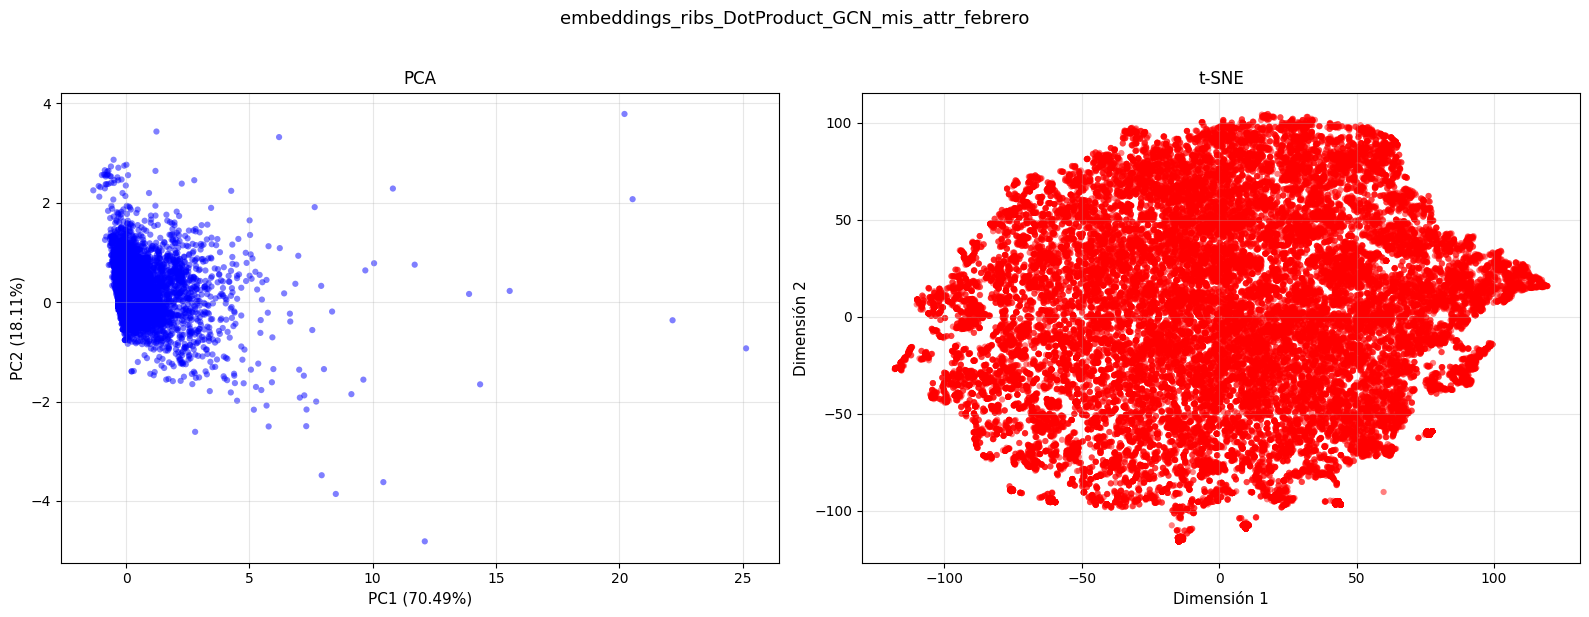


✓ Visualización completada

ANÁLISIS 2/25: embeddings_ribs_DotProduct_GraphSAGE_mis_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.2160
   - PC1: 0.1085
   - PC2: 0.1075

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


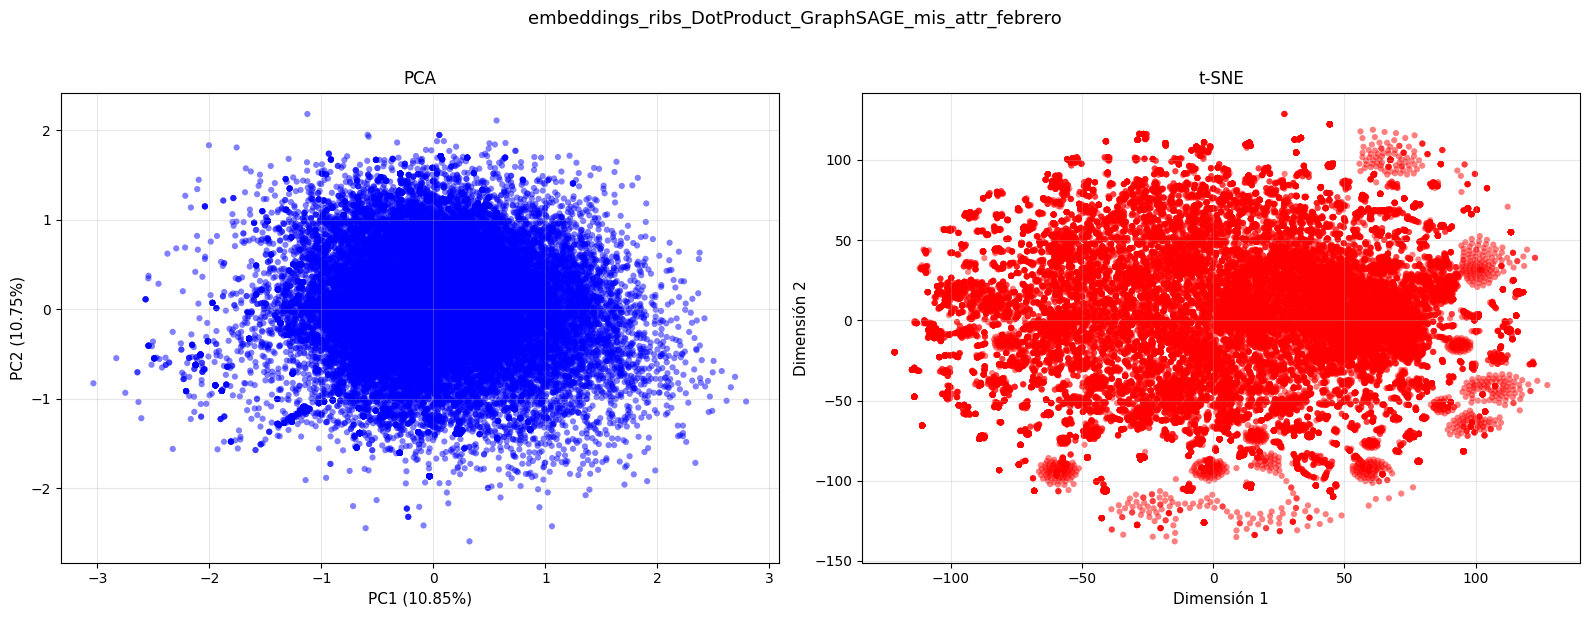


✓ Visualización completada

ANÁLISIS 3/25: embeddings_ribs_DotProduct_GAT_mis_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.6007
   - PC1: 0.4699
   - PC2: 0.1308

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


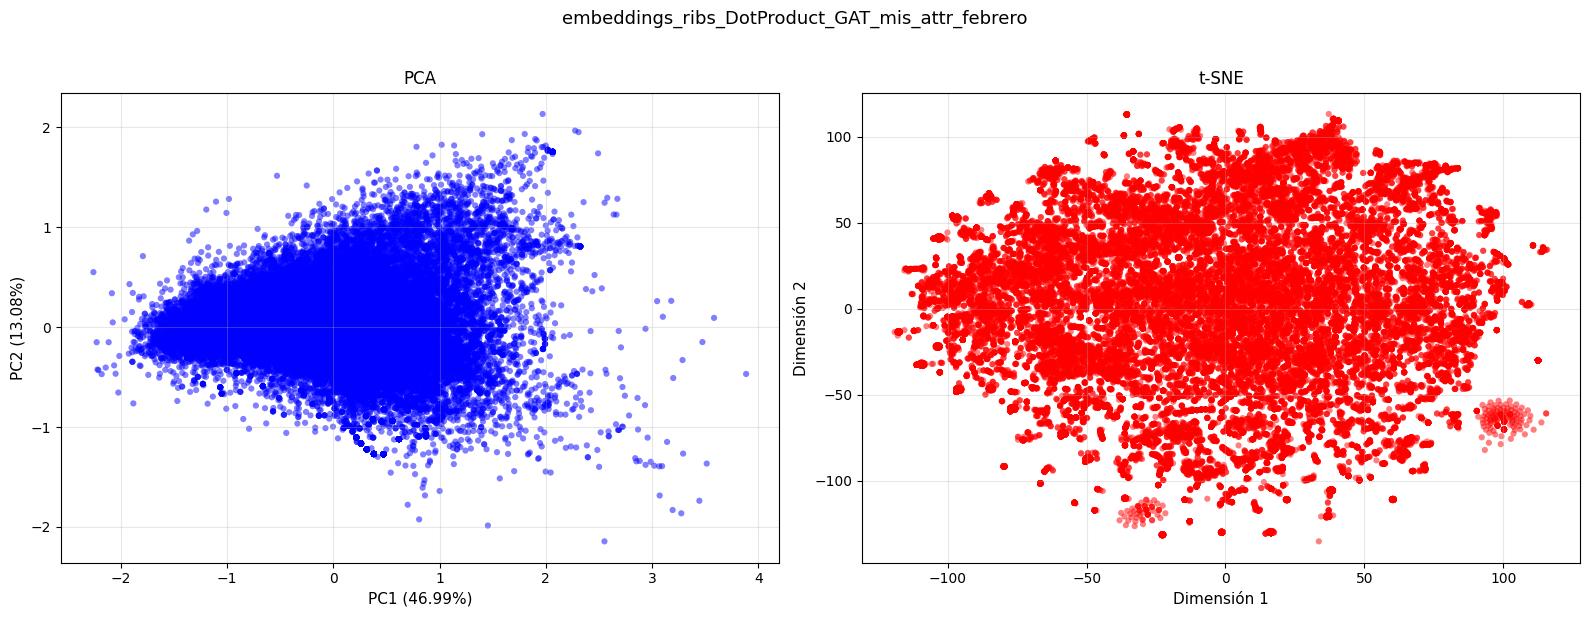


✓ Visualización completada

ANÁLISIS 4/25: embeddings_ribs_MLP_GCN_mis_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 16)
   • Dimensiones: 16
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.9988
   - PC1: 0.9939
   - PC2: 0.0049

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


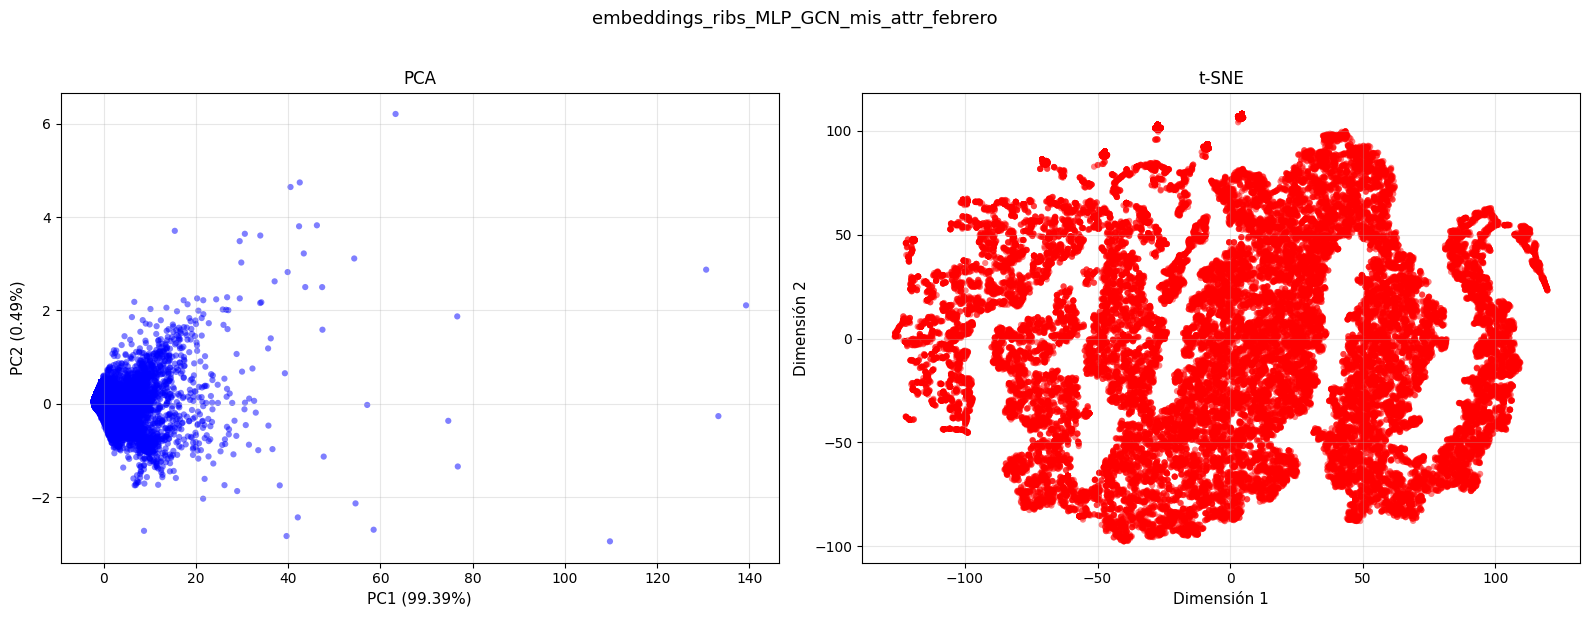


✓ Visualización completada

ANÁLISIS 5/25: embeddings_ribs_MLP_GraphSAGE_mis_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 16)
   • Dimensiones: 16
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.7521
   - PC1: 0.4714
   - PC2: 0.2807

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


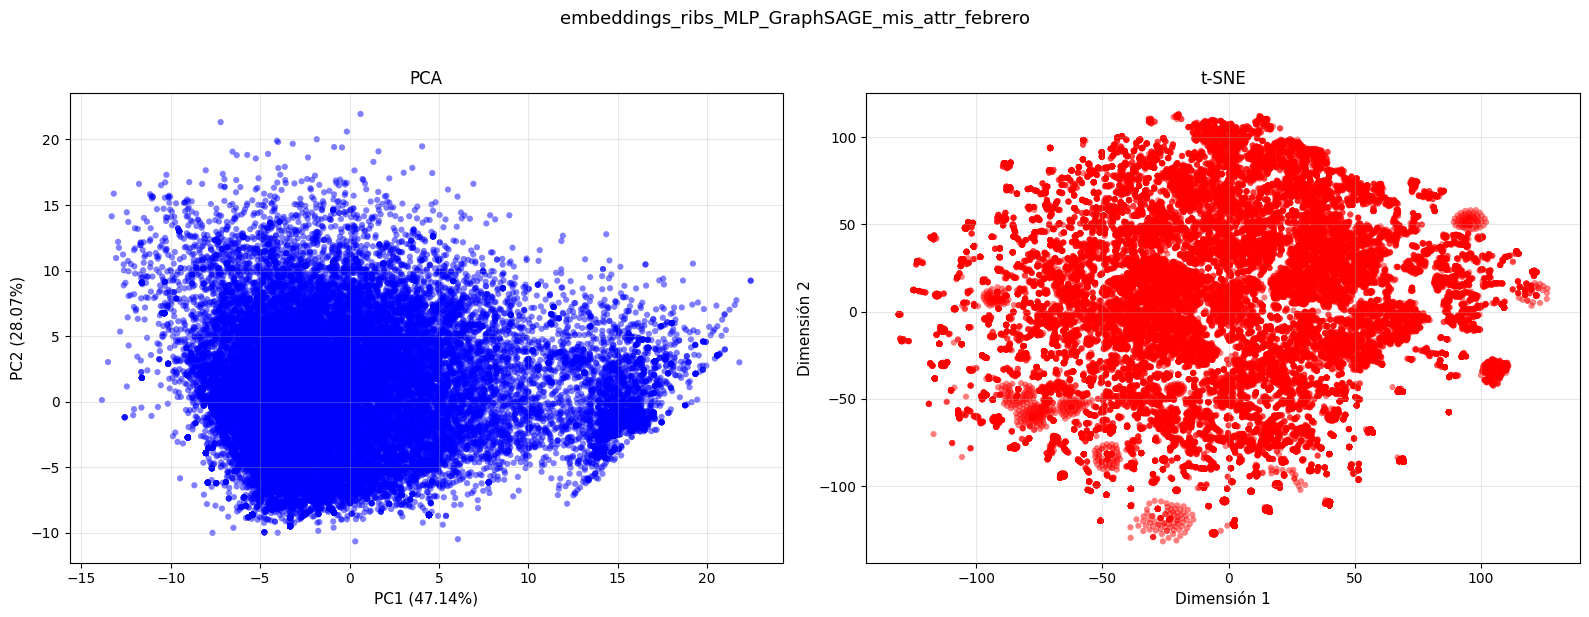


✓ Visualización completada

ANÁLISIS 6/25: embeddings_ribs_MLP_GAT_mis_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 16)
   • Dimensiones: 16
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.8644
   - PC1: 0.6178
   - PC2: 0.2466

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


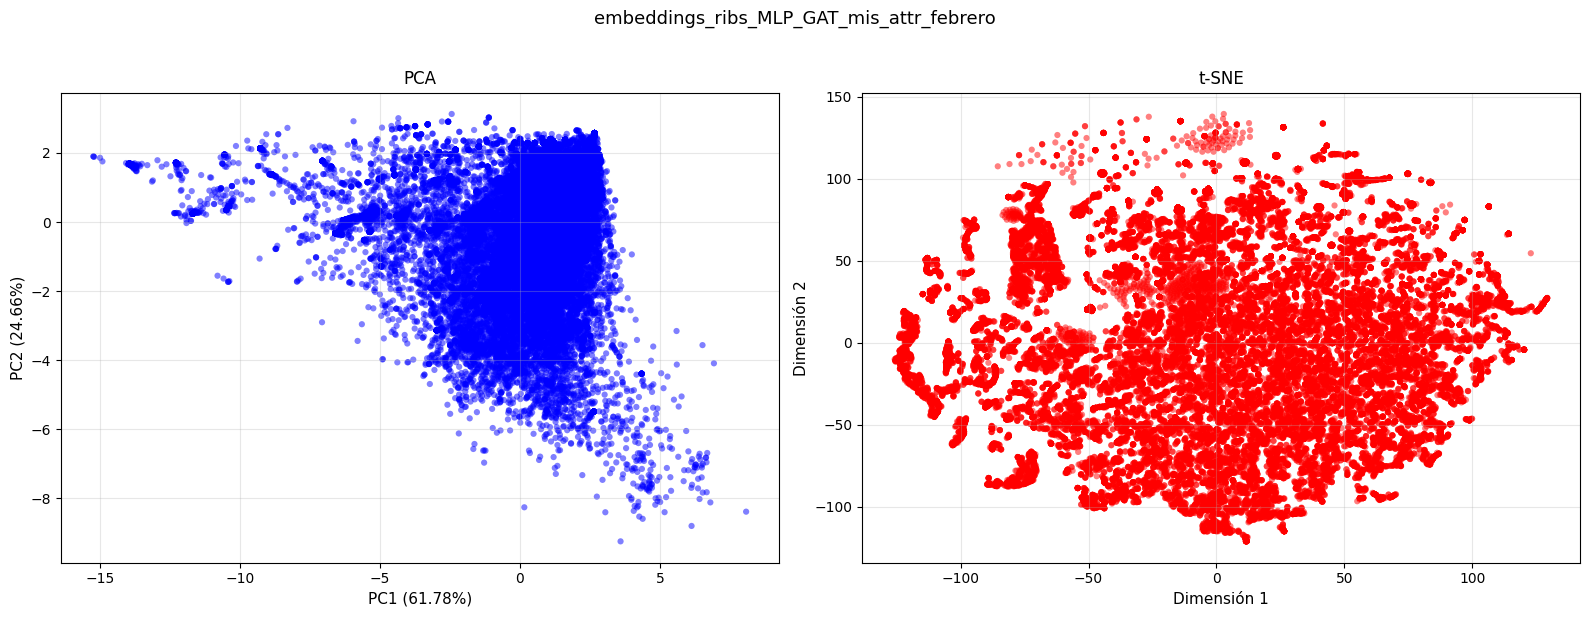


✓ Visualización completada

ANÁLISIS 7/25: embeddings_deepWalk_febrero

📊 Información de embeddings:
   • Forma: (42683, 32)
   • Dimensiones: 32
   • Número de nodos: 42683

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.2747
   - PC1: 0.1905
   - PC2: 0.0842

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


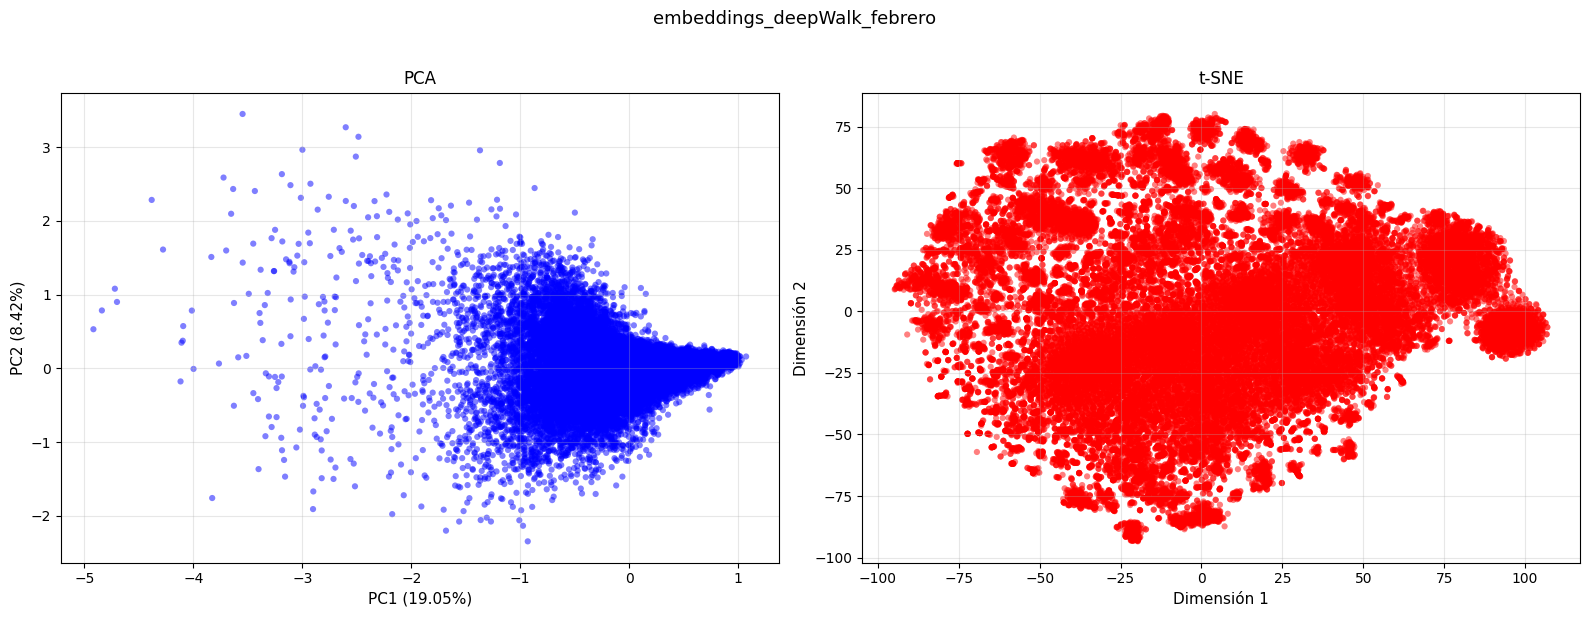


✓ Visualización completada

ANÁLISIS 8/25: embeddings_ribs_DotProduct_GCN_grado_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.9993
   - PC1: 0.9986
   - PC2: 0.0007

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


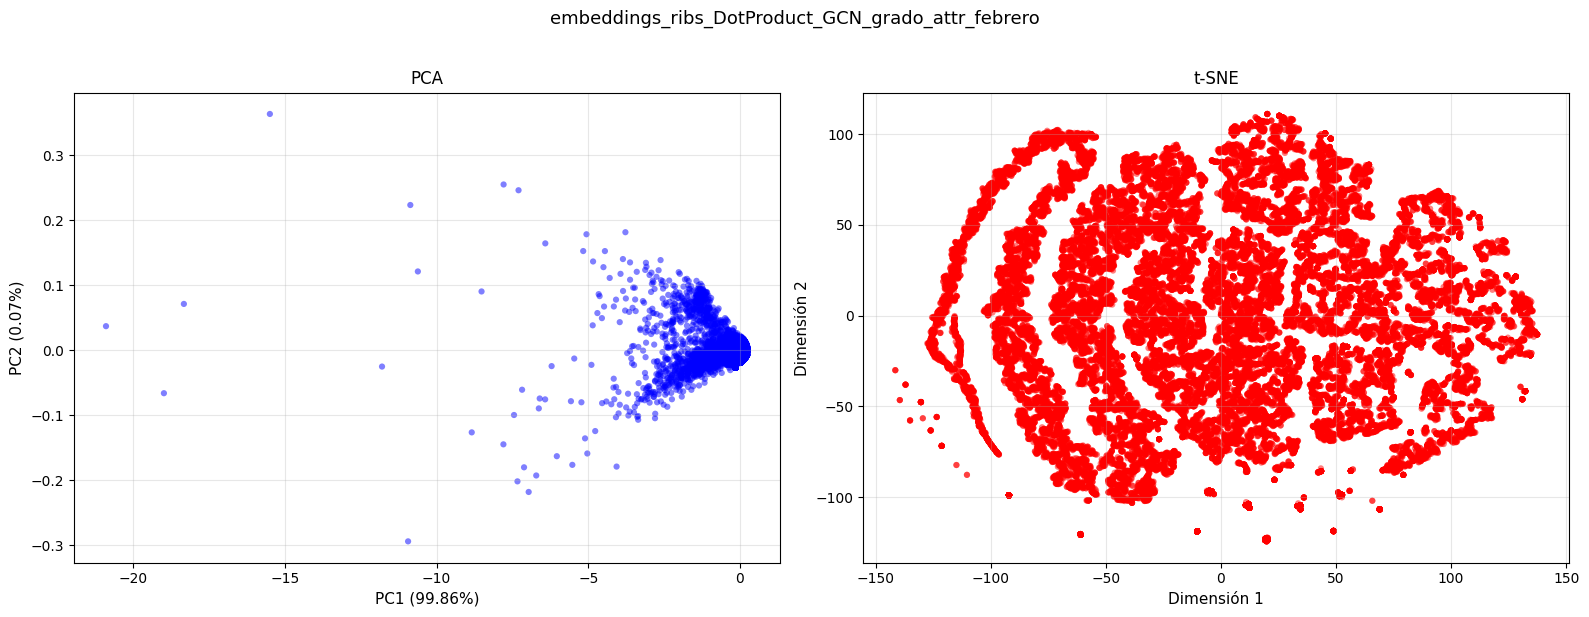


✓ Visualización completada

ANÁLISIS 9/25: embeddings_ribs_DotProduct_GraphSAGE_grado_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.8249
   - PC1: 0.5987
   - PC2: 0.2263

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


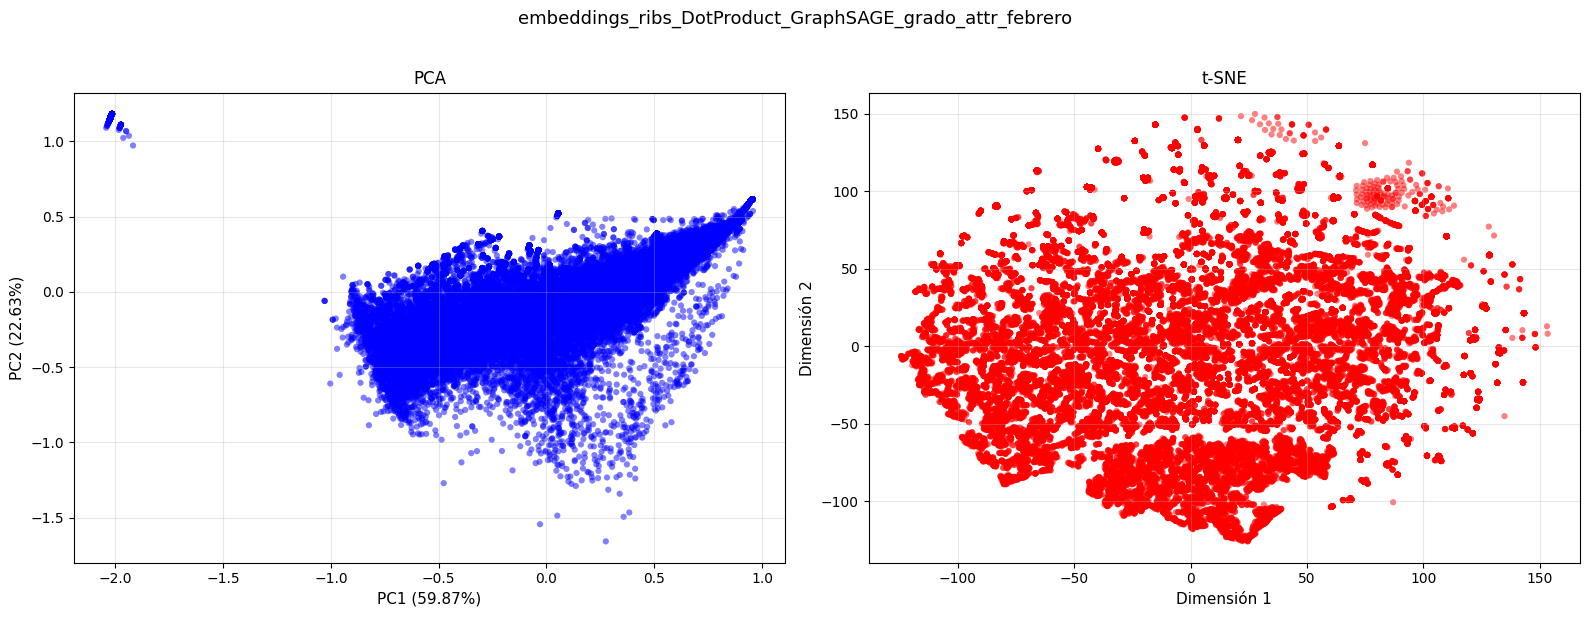


✓ Visualización completada

ANÁLISIS 10/25: embeddings_ribs_DotProduct_GAT_grado_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.9969
   - PC1: 0.9864
   - PC2: 0.0105

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


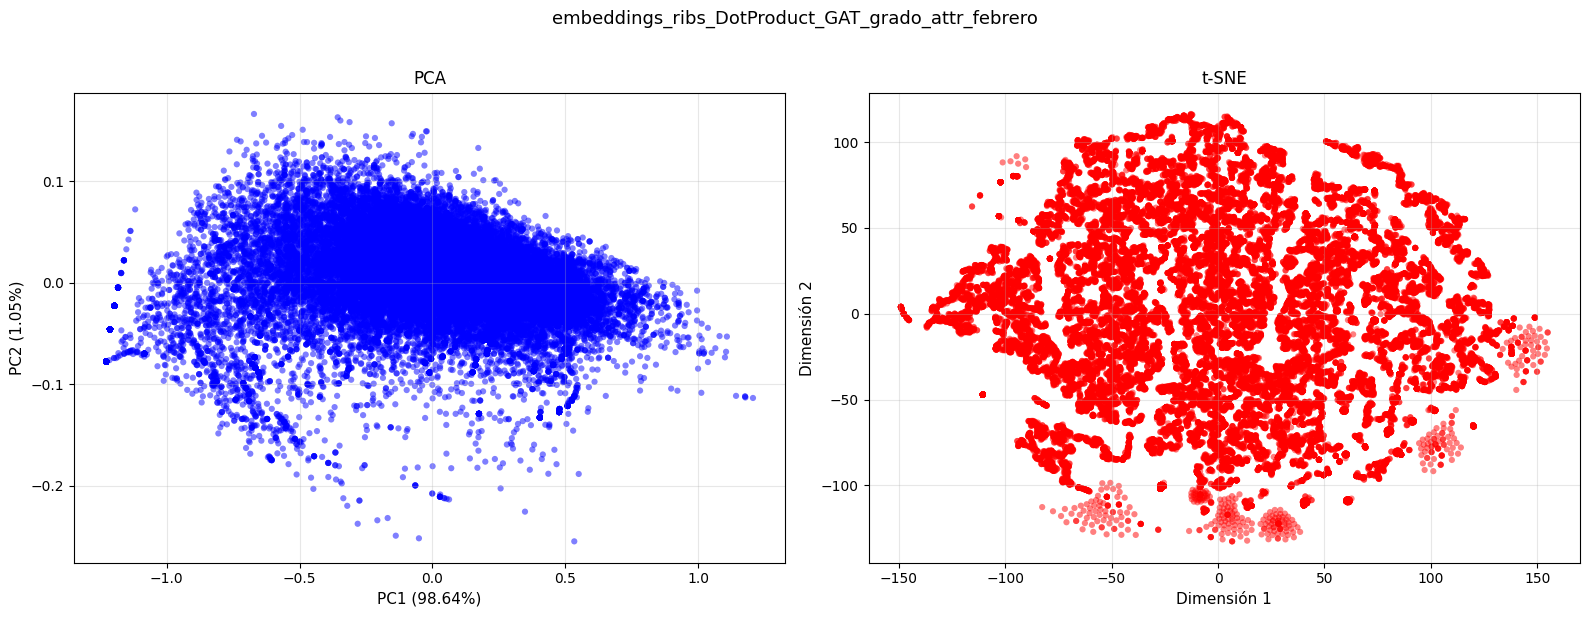


✓ Visualización completada

ANÁLISIS 11/25: embeddings_ribs_MLP_GCN_grado_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 16)
   • Dimensiones: 16
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 1.0000
   - PC1: 0.9974
   - PC2: 0.0026

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


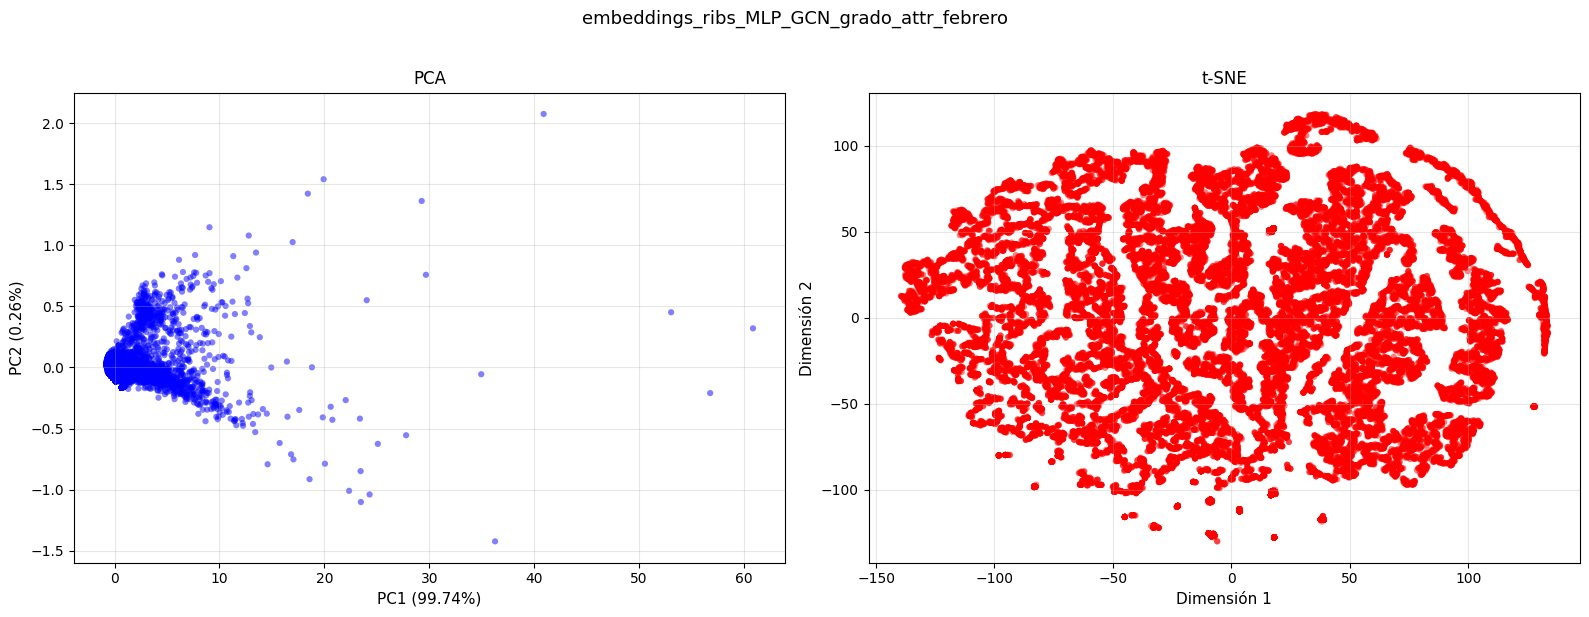


✓ Visualización completada

ANÁLISIS 12/25: embeddings_ribs_MLP_GraphSAGE_grado_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 16)
   • Dimensiones: 16
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.9418
   - PC1: 0.6195
   - PC2: 0.3224

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


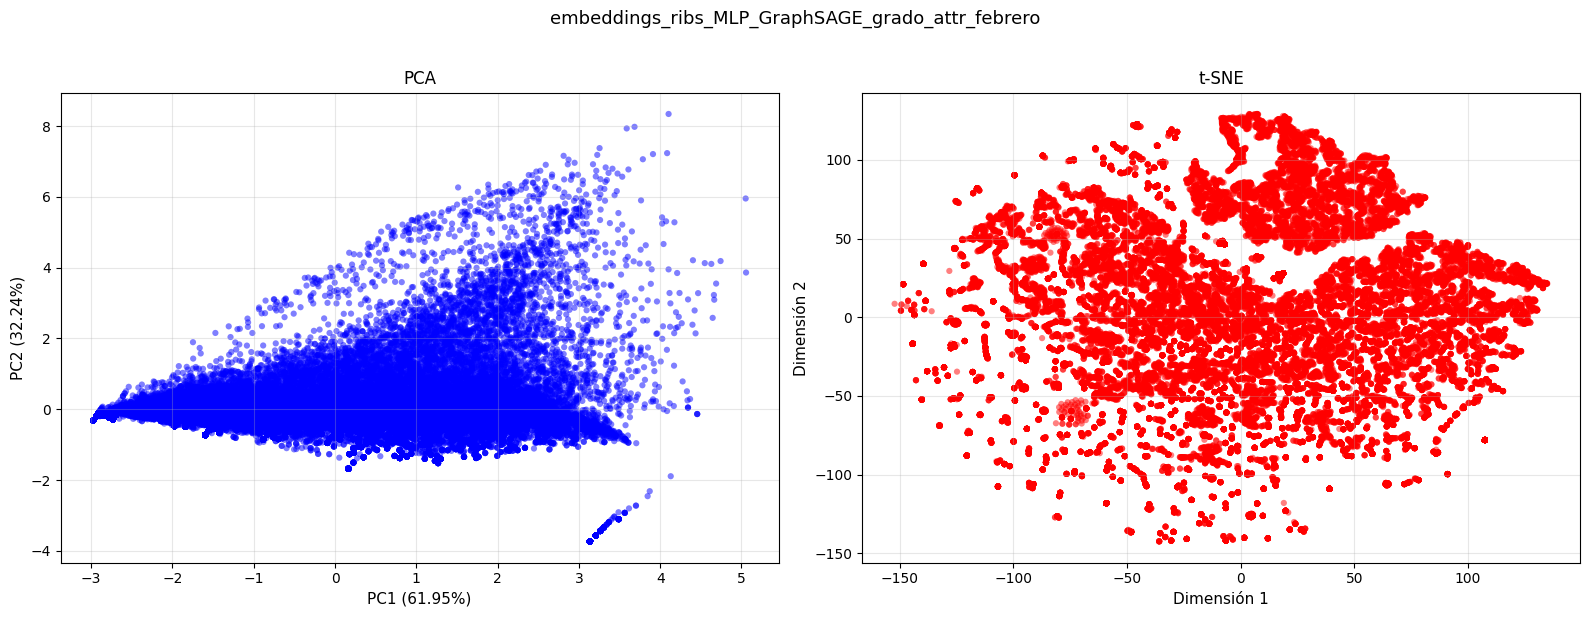


✓ Visualización completada

ANÁLISIS 13/25: embeddings_ribs_MLP_GAT_grado_attr_febrero

📊 Información de embeddings:
   • Forma: (42242, 16)
   • Dimensiones: 16
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.9995
   - PC1: 0.9949
   - PC2: 0.0046

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


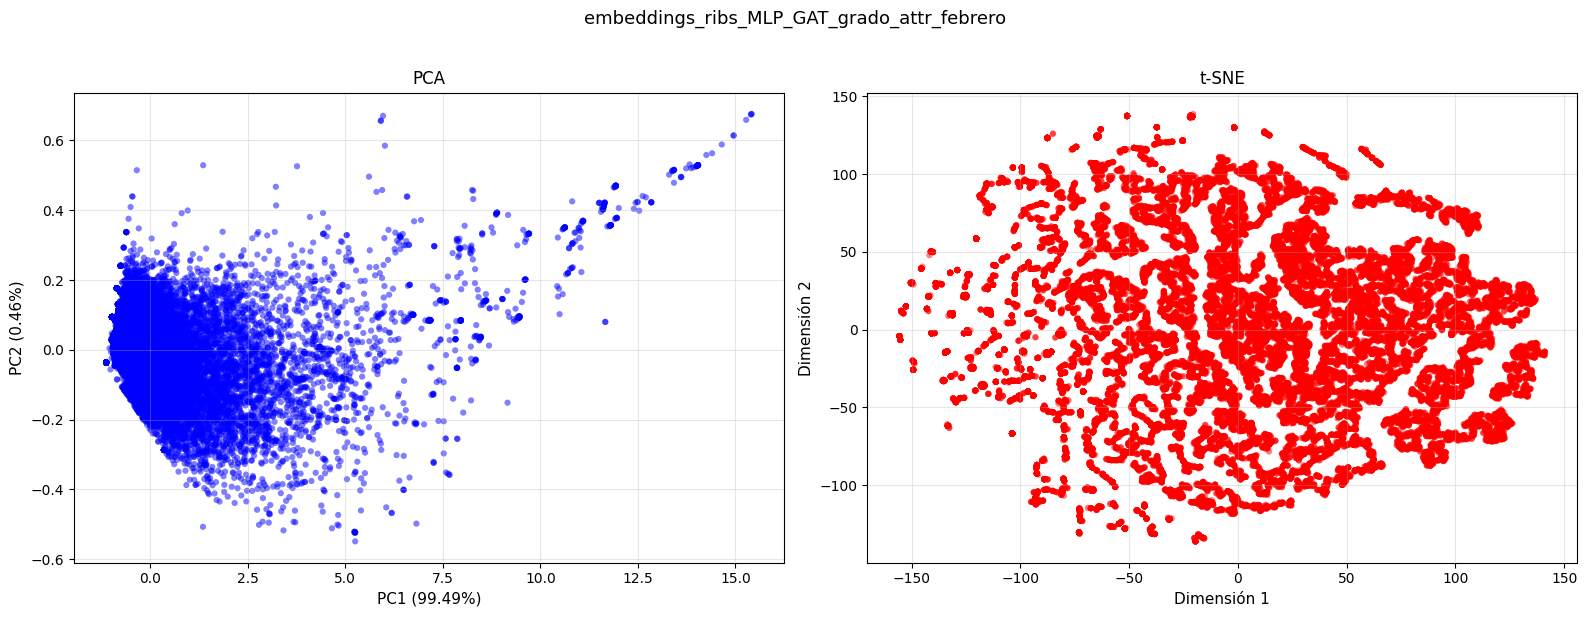


✓ Visualización completada

ANÁLISIS 14/25: embeddings_ribs_GCN_pagerank_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.6318
   - PC1: 0.5368
   - PC2: 0.0950

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


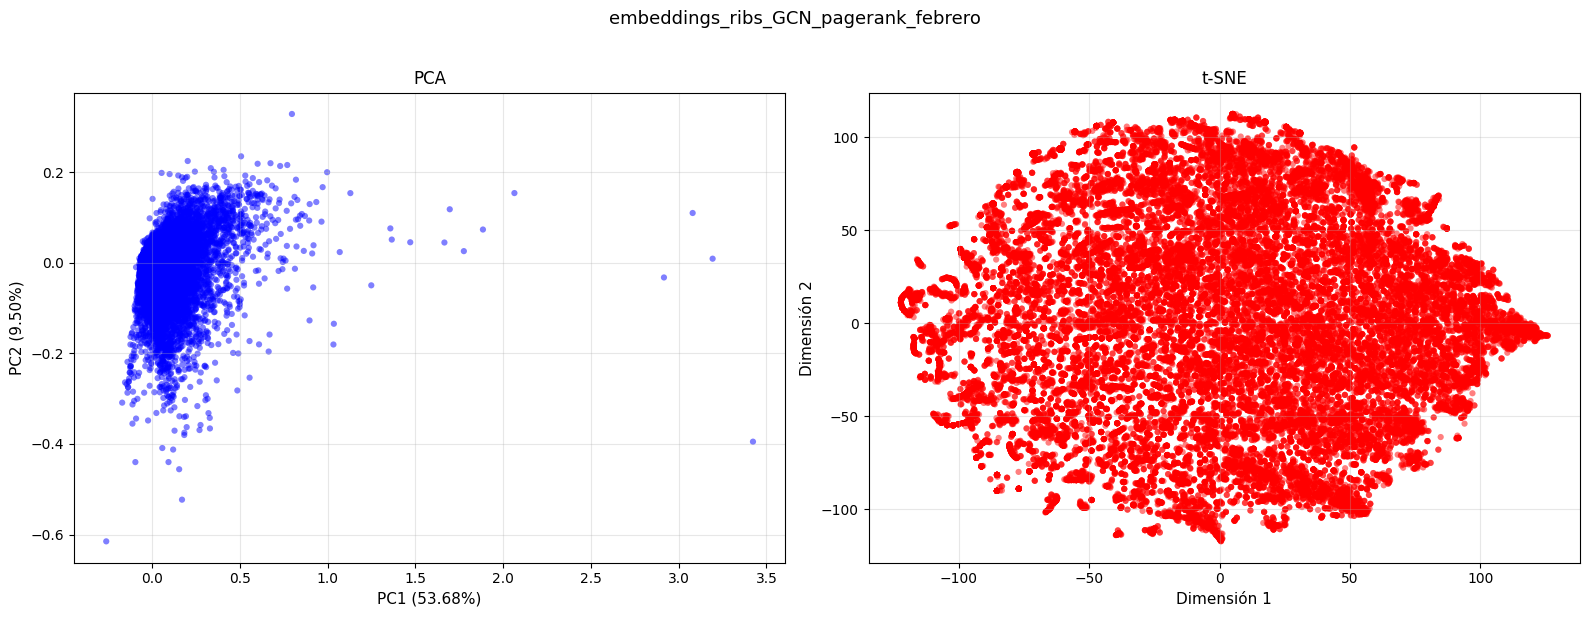


✓ Visualización completada

ANÁLISIS 15/25: embeddings_ribs_GraphSAGE_pagerank_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.3566
   - PC1: 0.2217
   - PC2: 0.1350

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


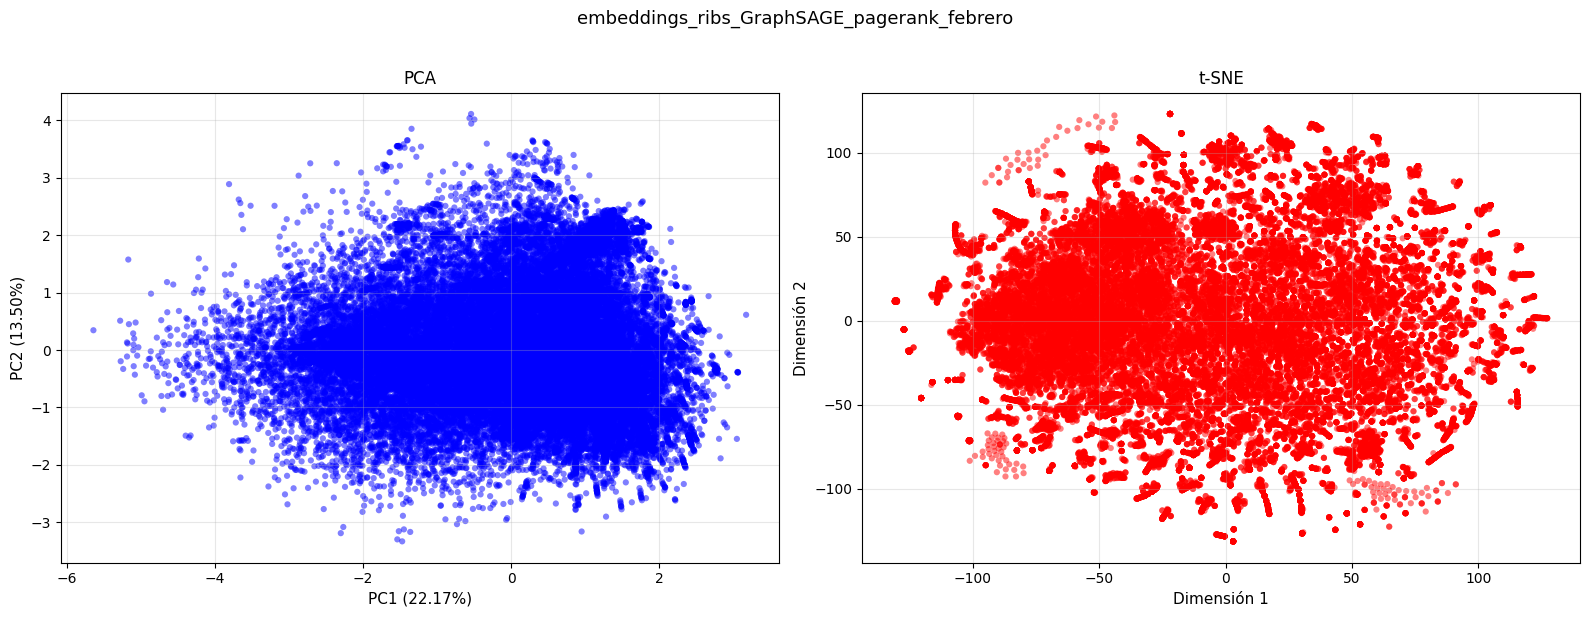


✓ Visualización completada

ANÁLISIS 16/25: embeddings_ribs_GAT_pagerank_febrero

📊 Información de embeddings:
   • Forma: (42242, 32)
   • Dimensiones: 32
   • Número de nodos: 42242

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.3882
   - PC1: 0.2340
   - PC2: 0.1541

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


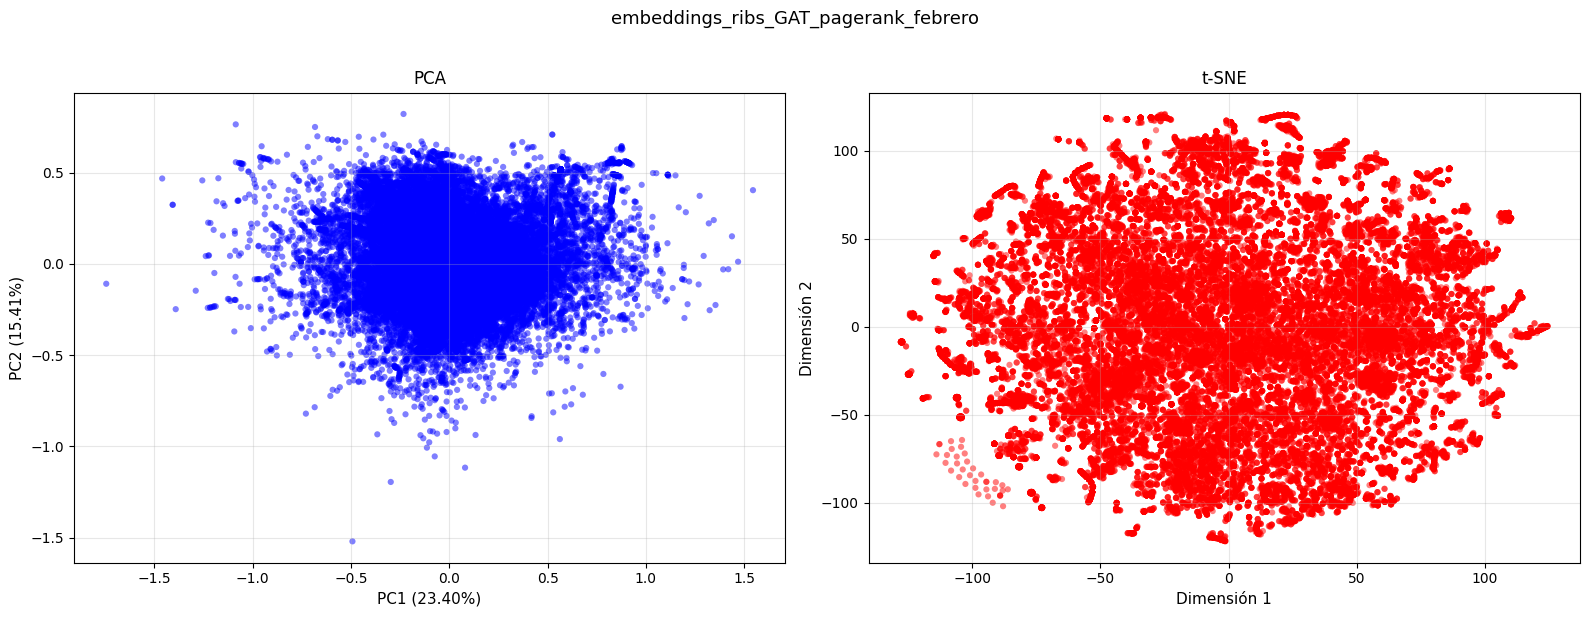


✓ Visualización completada

ANÁLISIS 17/25: embeddings_ribs_GCN_out_degree_febrero

📊 Información de embeddings:
   • Forma: (41423, 32)
   • Dimensiones: 32
   • Número de nodos: 41423

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.8194
   - PC1: 0.6797
   - PC2: 0.1396

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


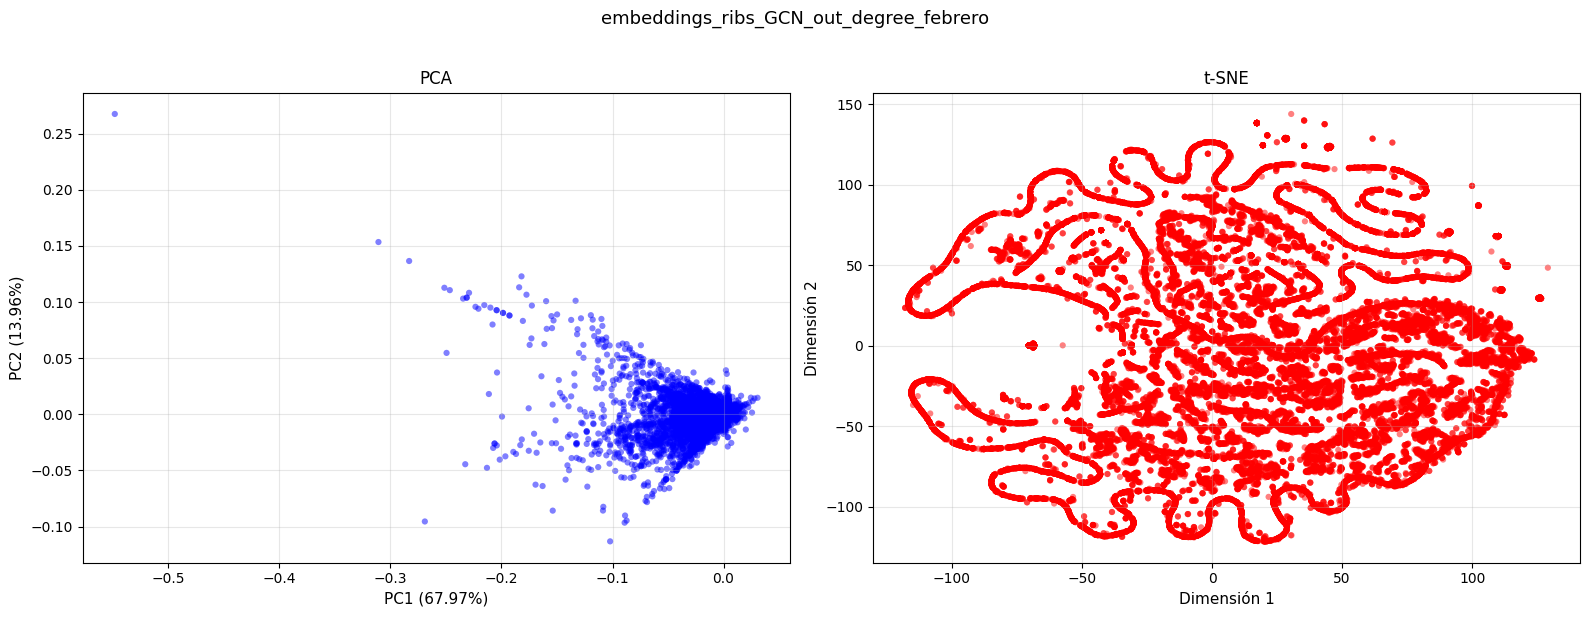


✓ Visualización completada

ANÁLISIS 18/25: embeddings_ribs_GraphSAGE_out_degree_febrero

📊 Información de embeddings:
   • Forma: (41423, 32)
   • Dimensiones: 32
   • Número de nodos: 41423

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.4225
   - PC1: 0.2301
   - PC2: 0.1924

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


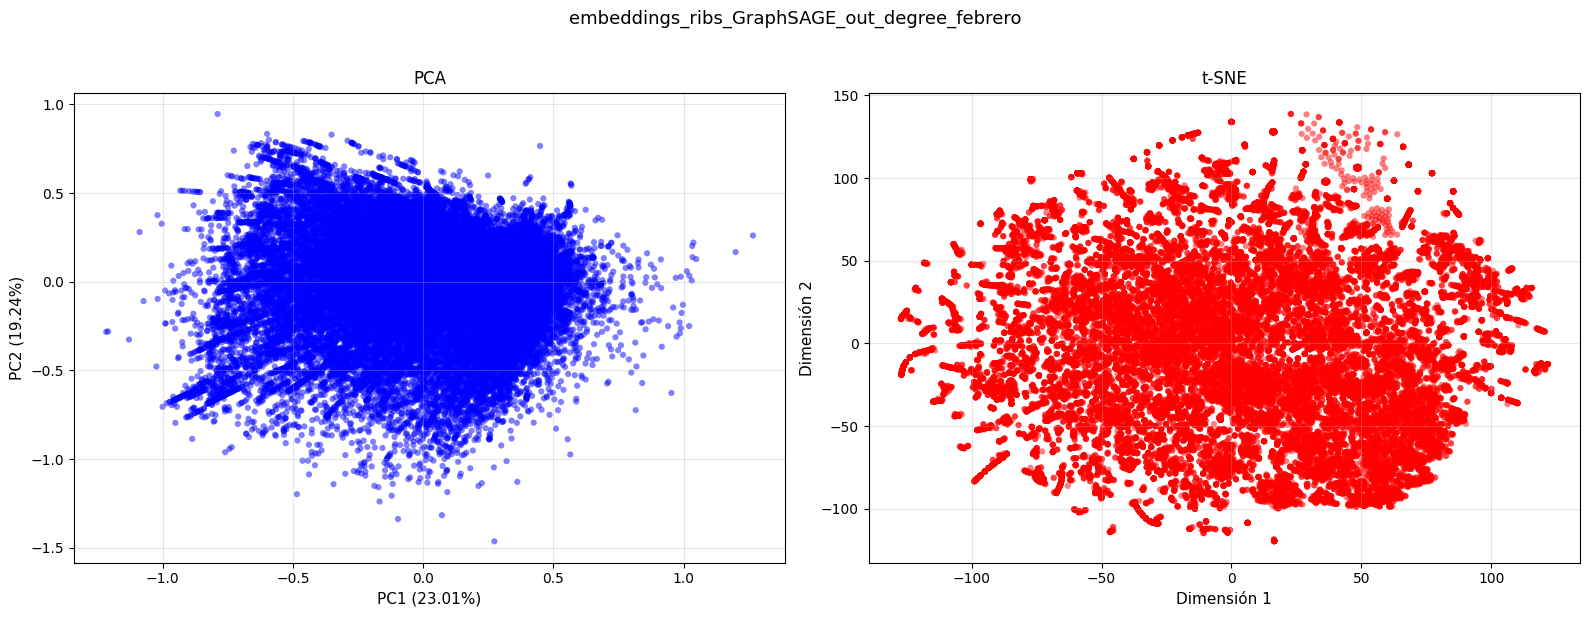


✓ Visualización completada

ANÁLISIS 19/25: embeddings_ribs_GAT_out_degree_febrero

📊 Información de embeddings:
   • Forma: (41423, 32)
   • Dimensiones: 32
   • Número de nodos: 41423

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.5088
   - PC1: 0.3253
   - PC2: 0.1835

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


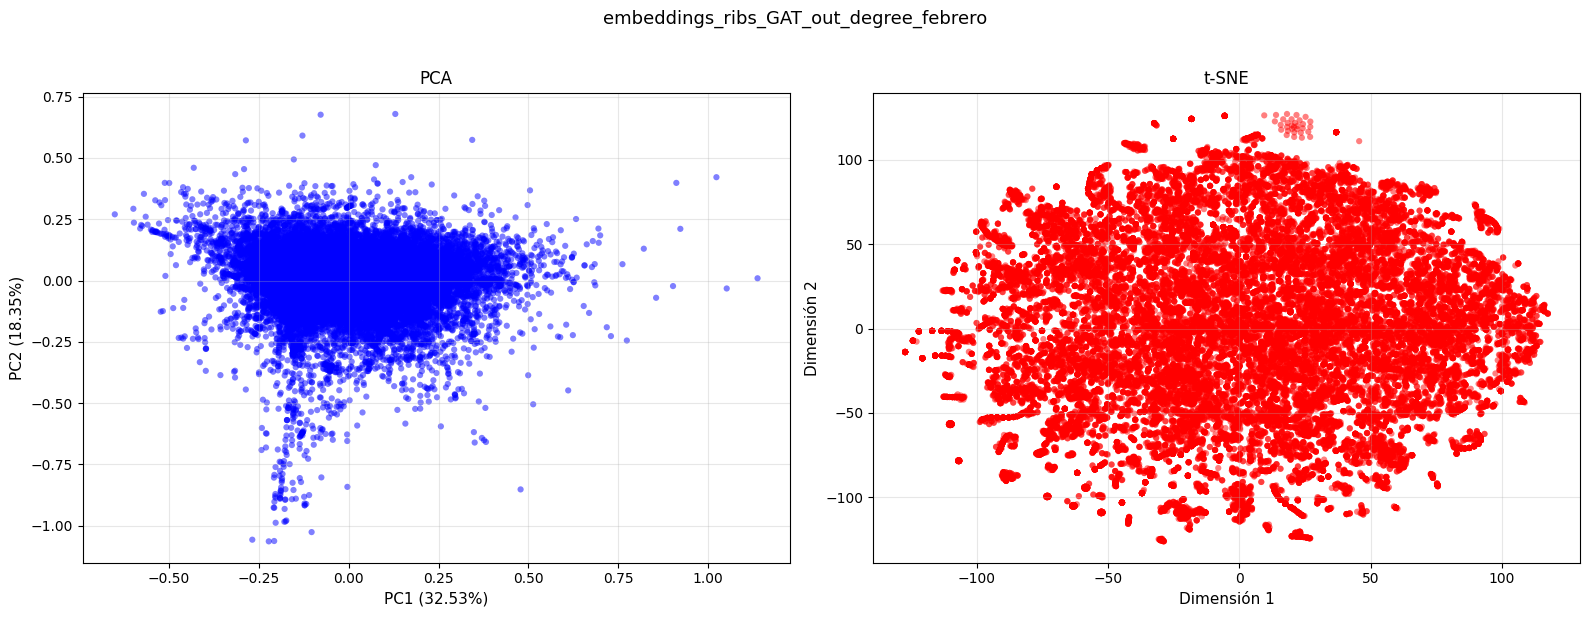


✓ Visualización completada

ANÁLISIS 20/25: embeddings_ribs_DotProduct_GCN_2022_attr_febrero

📊 Información de embeddings:
   • Forma: (46235, 32)
   • Dimensiones: 32
   • Número de nodos: 46235

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.7497
   - PC1: 0.6805
   - PC2: 0.0692

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


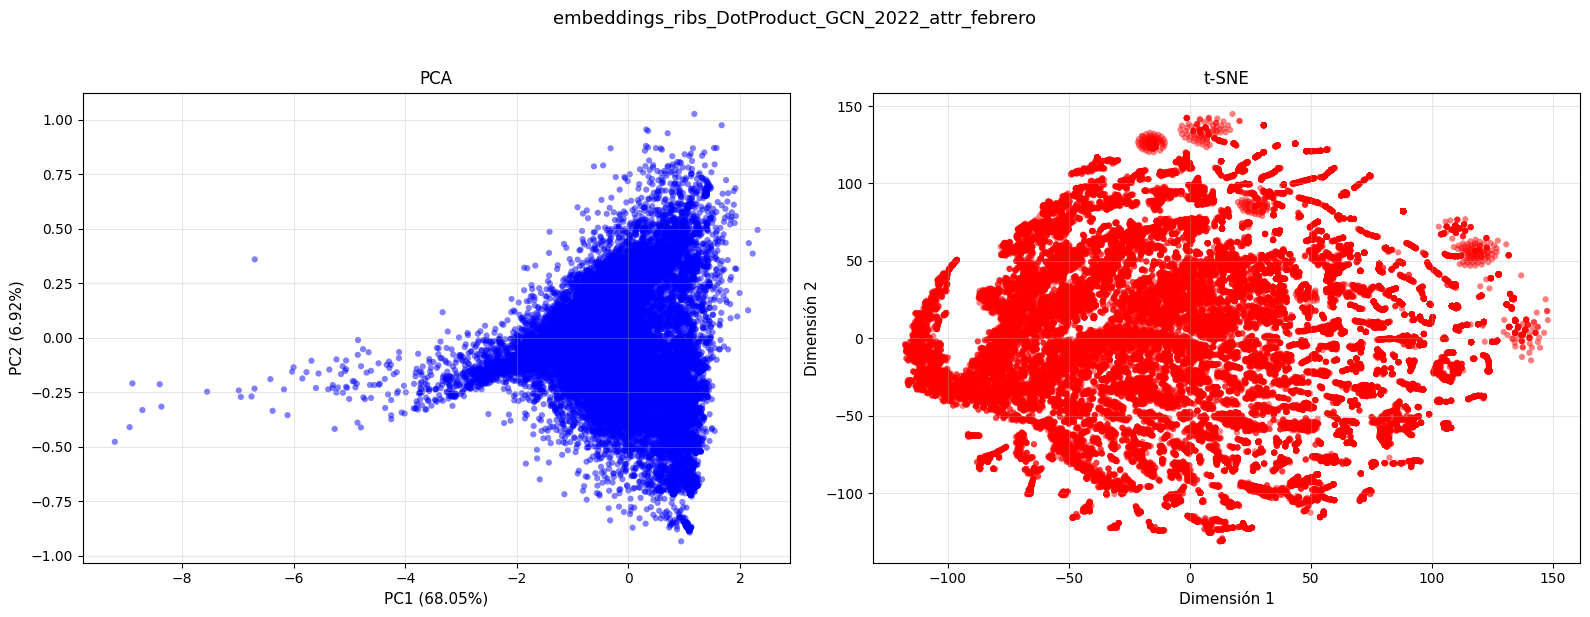


✓ Visualización completada

ANÁLISIS 21/25: embeddings_ribs_DotProduct_GraphSAGE_2022_attr_febrero

📊 Información de embeddings:
   • Forma: (46235, 32)
   • Dimensiones: 32
   • Número de nodos: 46235

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.2887
   - PC1: 0.1844
   - PC2: 0.1043

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


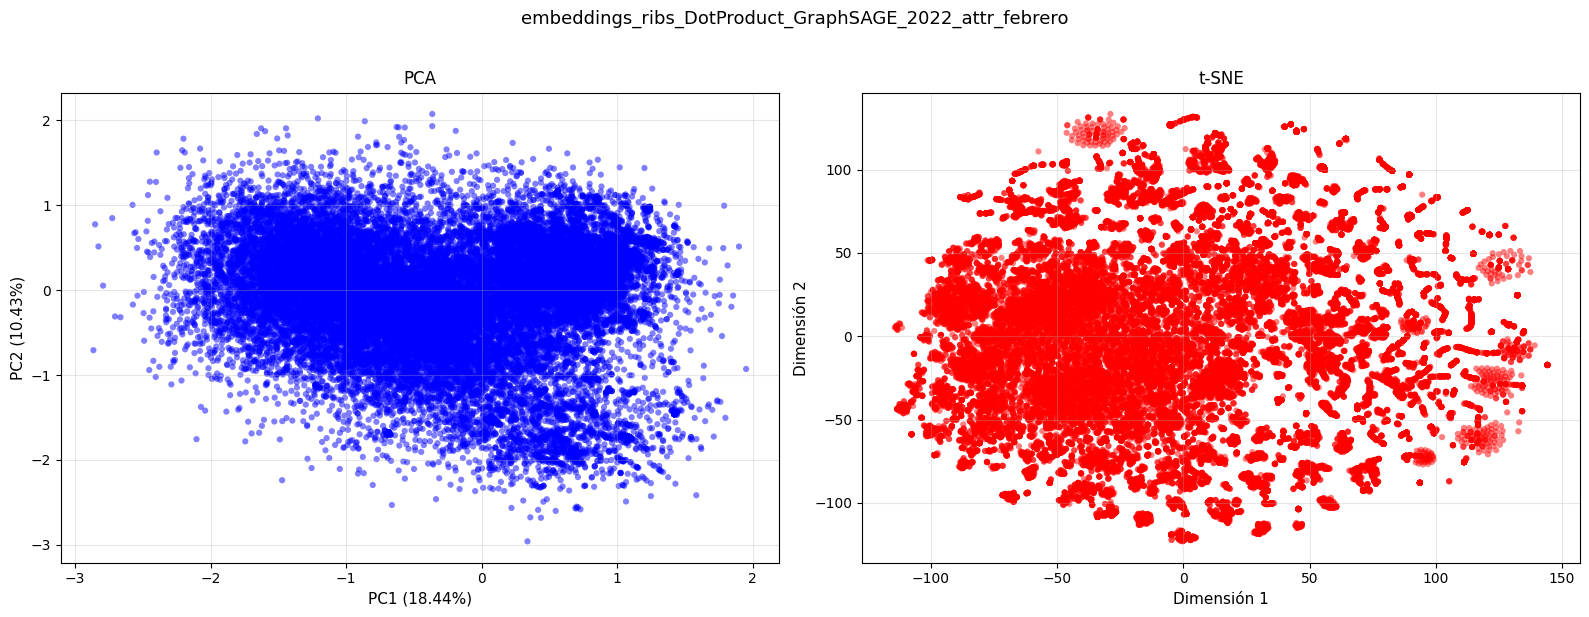


✓ Visualización completada

ANÁLISIS 22/25: embeddings_ribs_DotProduct_GAT_2022_attr_febrero

📊 Información de embeddings:
   • Forma: (46235, 32)
   • Dimensiones: 32
   • Número de nodos: 46235

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.5335
   - PC1: 0.4097
   - PC2: 0.1238

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


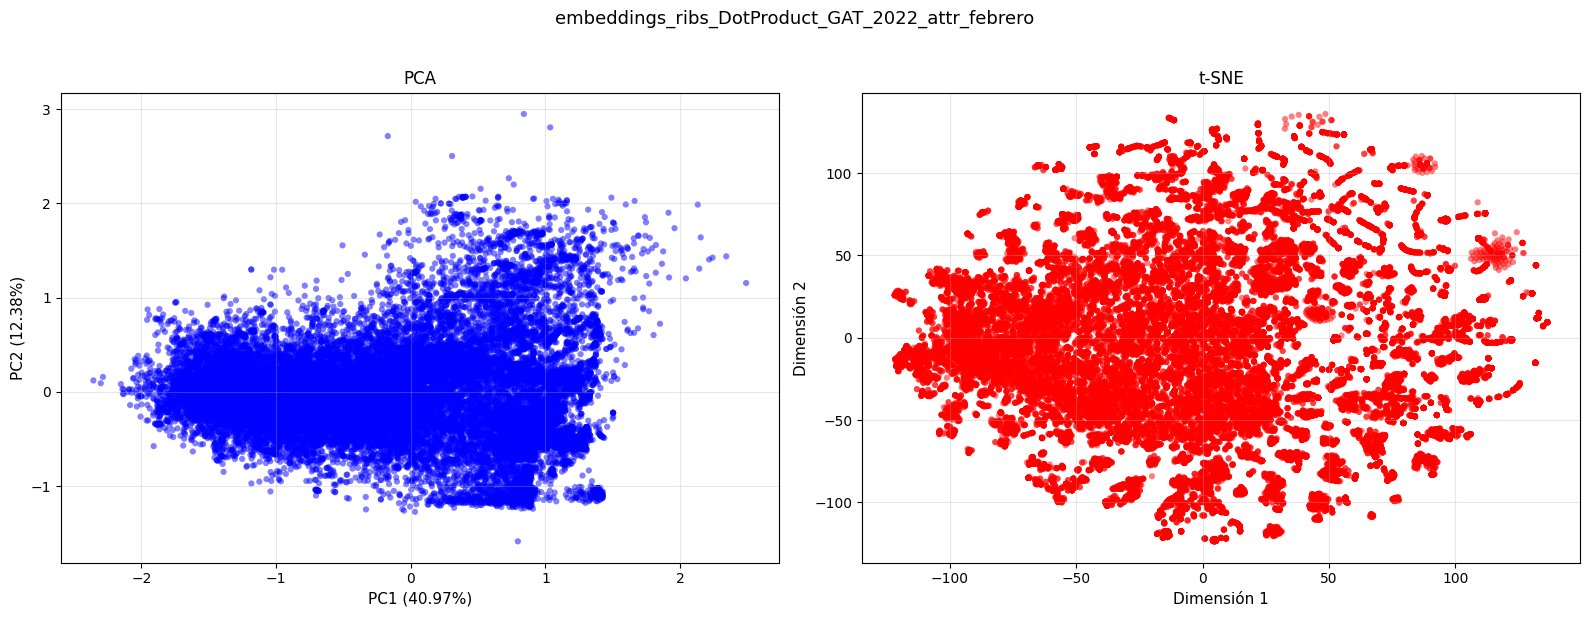


✓ Visualización completada

ANÁLISIS 23/25: embeddings_ribs_MLP_GCN_2022_attr_febrero

📊 Información de embeddings:
   • Forma: (46235, 16)
   • Dimensiones: 16
   • Número de nodos: 46235

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.8463
   - PC1: 0.6534
   - PC2: 0.1929

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


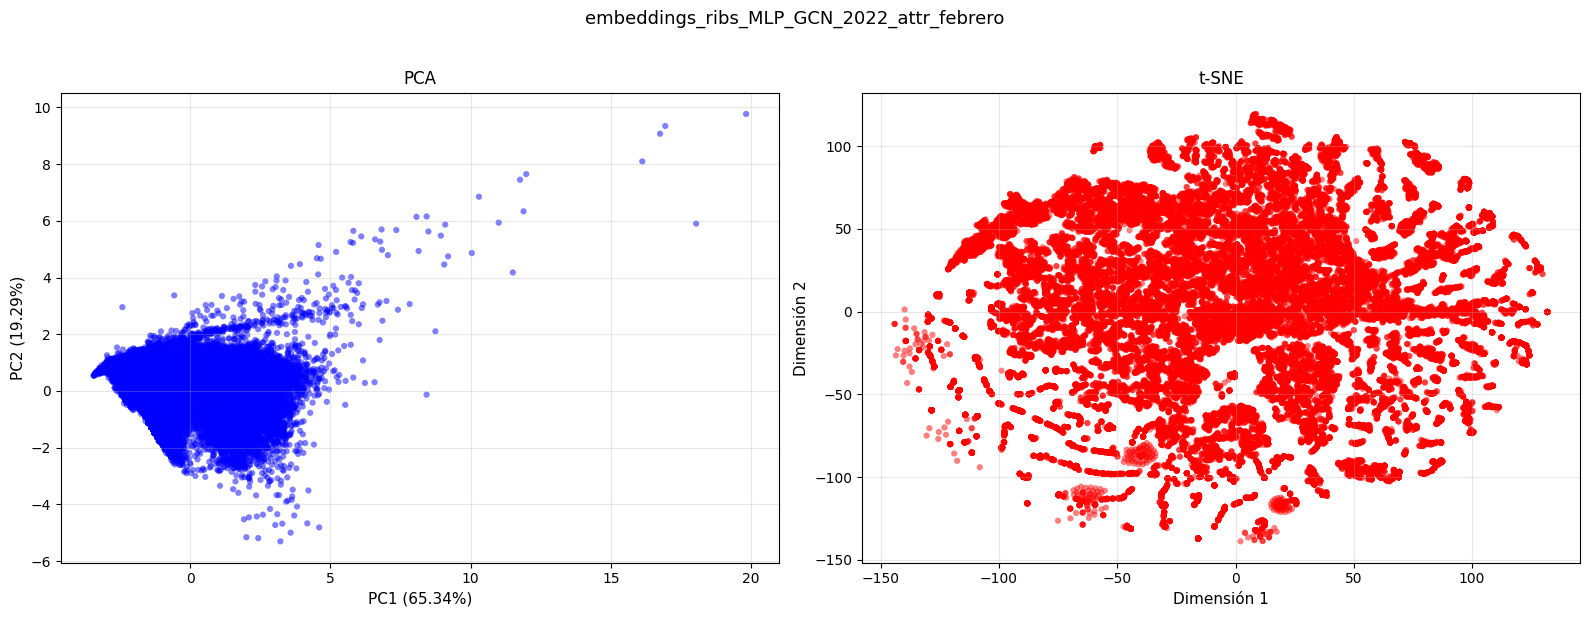


✓ Visualización completada

ANÁLISIS 24/25: embeddings_ribs_MLP_GraphSAGE_2022_attr_febrero

📊 Información de embeddings:
   • Forma: (46235, 16)
   • Dimensiones: 16
   • Número de nodos: 46235

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.9351
   - PC1: 0.8850
   - PC2: 0.0501

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


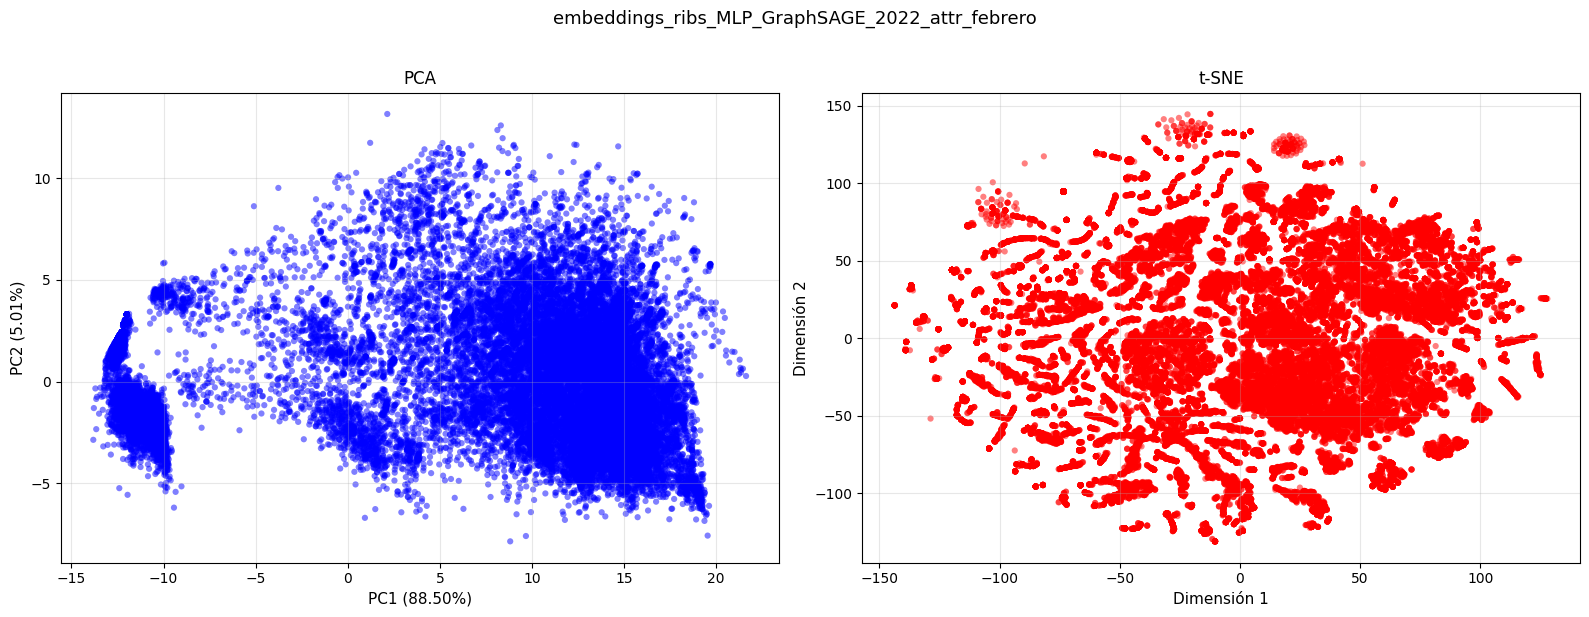


✓ Visualización completada

ANÁLISIS 25/25: embeddings_ribs_MLP_GAT_2022_attr_febrero

📊 Información de embeddings:
   • Forma: (46235, 16)
   • Dimensiones: 16
   • Número de nodos: 46235

⏳ Aplicando PCA (2 componentes)...
✓ Varianza explicada: 0.8633
   - PC1: 0.7866
   - PC2: 0.0766

⏳ Aplicando t-SNE (perplexity=30)...
✓ t-SNE completado


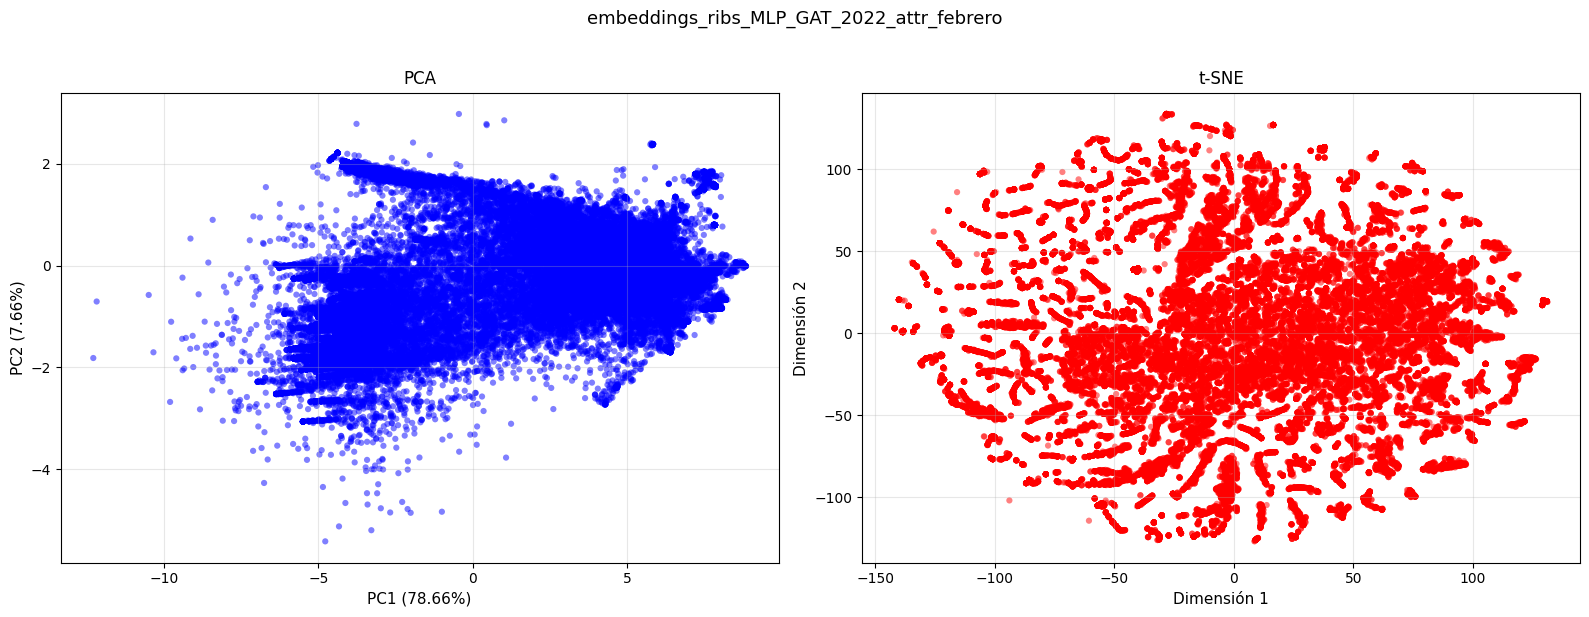


✓ Visualización completada

ANÁLISIS DE VISUALIZACIÓN COMPLETADO


In [16]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("=" * 70)
print("VISUALIZACIÓN DE EMBEDDINGS")
print("=" * 70)

# Convertir embeddings a numpy si es necesario
if isinstance(embeddings_pt, torch.Tensor):
    embeddings_np = embeddings_pt.cpu().detach().numpy()
else:
    embeddings_np = embeddings_pt

print(f"\n📊 Información de embeddings:")
print(f"   • Forma: {embeddings_np.shape}")
print(f"   • Dimensiones: {embeddings_np.shape[1]}")
print(f"   • Número de nodos: {embeddings_np.shape[0]}")

# Reducción con PCA
print("\n⏳ Aplicando PCA (2 componentes)...")
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_np)
print(f"✓ Varianza explicada: {pca.explained_variance_ratio_.sum():.4f}")
print(f"   - PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"   - PC2: {pca.explained_variance_ratio_[1]:.4f}")

# Reducción con t-SNE
# Procesar cada embedding
for idx, embeddings_path in enumerate(embeddings_to_analyze, 1):
    embeddings_name = embeddings_path.split('/')[-1].split('.')[0]
    
    print("\n" + "=" * 70)
    print(f"ANÁLISIS {idx}/{len(embeddings_to_analyze)}: {embeddings_name}")
    print("=" * 70)
    
    try:
        # Cargar embeddings
        embeddings_pt = torch.load(embeddings_path)
        
        # Convertir a numpy si es necesario
        if isinstance(embeddings_pt, torch.Tensor):
            embeddings_np = embeddings_pt.cpu().detach().numpy()
        else:
            embeddings_np = embeddings_pt
        
        print(f"\n📊 Información de embeddings:")
        print(f"   • Forma: {embeddings_np.shape}")
        print(f"   • Dimensiones: {embeddings_np.shape[1]}")
        print(f"   • Número de nodos: {embeddings_np.shape[0]}")
        
        # Reducción con PCA
        print("\n⏳ Aplicando PCA (2 componentes)...")
        pca = PCA(n_components=2)
        embeddings_pca = pca.fit_transform(embeddings_np)
        print(f"✓ Varianza explicada: {pca.explained_variance_ratio_.sum():.4f}")
        print(f"   - PC1: {pca.explained_variance_ratio_[0]:.4f}")
        print(f"   - PC2: {pca.explained_variance_ratio_[1]:.4f}")
        
        # Reducción con t-SNE
        print("\n⏳ Aplicando t-SNE (perplexity=30)...")
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
        embeddings_tsne = tsne.fit_transform(embeddings_np)
        print("✓ t-SNE completado")
        
        # Visualización
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # PCA
        axes[0].scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], 
                       alpha=0.5, s=20, c='blue', edgecolors='none')
        axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=11)
        axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=11)
        axes[0].set_title(f'PCA', fontsize=12)
        axes[0].grid(True, alpha=0.3)
        
        # t-SNE
        axes[1].scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], 
                       alpha=0.5, s=20, c='red', edgecolors='none')
        axes[1].set_xlabel('Dimensión 1', fontsize=11)
        axes[1].set_ylabel('Dimensión 2', fontsize=11)
        axes[1].set_title(f't-SNE', fontsize=12)
        axes[1].grid(True, alpha=0.3)
        
        plt.suptitle(f'{embeddings_name}', fontsize=13, y=1.02)
        plt.tight_layout()
        plt.show()
        
        print("\n✓ Visualización completada")
        
    except Exception as e:
        print(f"\n✗ Error al procesar {embeddings_name}: {str(e)}")
        continue

print("\n" + "=" * 70)
print("ANÁLISIS DE VISUALIZACIÓN COMPLETADO")
print("=" * 70)

## Correlación entre embeddings y atributos

In [ ]:
# Procesar cada embedding
for idx, embeddings_path in enumerate(embeddings_to_analyze, 1):
    embeddings_name = embeddings_path.split('/')[-1].split('.')[0]
    
    print("\n" + "=" * 70)
    print(f"CORRELACIÓN {idx}/{len(embeddings_to_analyze)}: {embeddings_name}")
    print("=" * 70)
    
    try:
        # Cargar embeddings
        embeddings_pt = torch.load(embeddings_path)
        
        # Convertir a numpy si es necesario
        if isinstance(embeddings_pt, torch.Tensor):
            embeddings_np = embeddings_pt.cpu().detach().numpy()
        else:
            embeddings_np = embeddings_pt
        
        if g is not None:
            # Asegurarse de que las dimensiones coincidan
            num_nodes_graph = g.num_nodes()
            num_nodes_embeddings = embeddings_np.shape[0]
            
            if num_nodes_graph != num_nodes_embeddings:
                print(f"\n⚠️  Advertencia: Mismatch en número de nodos")
                print(f"   Grafo: {num_nodes_graph}, Embeddings: {num_nodes_embeddings}")
                min_nodes = min(num_nodes_graph, num_nodes_embeddings)
                print(f"   Usando los primeros {min_nodes} nodos")
            else:
                min_nodes = num_nodes_graph
            
            # Calcular atributos del grafo
            node_attrs = {
                'in_degree': g.in_degrees().numpy()[:min_nodes],
                'out_degree': g.out_degrees().numpy()[:min_nodes],
                'total_degree': (g.in_degrees() + g.out_degrees()).numpy()[:min_nodes]
            }
            
            # Agregar métricas si están disponibles
            if 'betweenness_centrality' in locals() and betweenness_centrality:
                node_attrs['betweenness'] = np.array([betweenness_centrality.get(i, 0) for i in range(min_nodes)])
            if 'pagerank' in locals() and pagerank:
                node_attrs['pagerank'] = np.array([pagerank.get(i, 0) for i in range(min_nodes)])
            if 'closeness_centrality' in locals() and closeness_centrality:
                node_attrs['closeness'] = np.array([closeness_centrality.get(i, 0) for i in range(min_nodes)])
            
            # Calcular correlaciones entre cada dimensión del embedding y cada atributo
            print("\n📊 Correlaciones (Dimensiones de Embedding vs Atributos):\n")
            
            correlations_summary = {}
            
            for attr_name, attr_values in node_attrs.items():
                print(f"\n{attr_name}:")
                correlations = []
                
                for dim in range(embeddings_np.shape[1]):
                    emb_dim = embeddings_np[:min_nodes, dim]
                    corr = np.corrcoef(emb_dim, attr_values)[0, 1]
                    correlations.append(corr)
                
                correlations = np.array(correlations)
                correlations_summary[attr_name] = correlations
                
                # Estadísticas
                max_corr_idx = np.argmax(np.abs(correlations))
                print(f"   • Correlación máxima: dim {max_corr_idx} → {correlations[max_corr_idx]:.4f}")
                print(f"   • Correlación media (abs): {np.mean(np.abs(correlations)):.4f}")
                print(f"   • Top 3 dimensiones correlacionadas:")
                
                top_dims = np.argsort(np.abs(correlations))[-3:][::-1]
                for i, dim_idx in enumerate(top_dims, 1):
                    print(f"      {i}. Dim {dim_idx}: {correlations[dim_idx]:.4f}")
            
            # Visualización: Heatmap de correlaciones
            print("\n📈 Generando visualización...")
            
            # Preparar datos para heatmap
            corr_matrix = np.array([correlations_summary[attr] for attr in node_attrs.keys()])
            
            plt.figure(figsize=(14, 6))
            sns.heatmap(corr_matrix, 
                        xticklabels=[f'Dim {i}' for i in range(embeddings_np.shape[1])],
                        yticklabels=list(node_attrs.keys()),
                        cmap='RdBu_r', 
                        center=0,
                        vmin=-1, 
                        vmax=1,
                        cbar_kws={'label': 'Correlación'})
            plt.title(f'Correlación entre Dimensiones de Embedding y Atributos\n{embeddings_name}', 
                      fontsize=13, pad=15)
            plt.xlabel('Dimensión del Embedding', fontsize=11)
            plt.ylabel('Atributo del Grafo', fontsize=11)
            plt.tight_layout()
            plt.show()
            
            # Distribución de correlaciones
            plt.figure(figsize=(12, 4))
            
            for i, (attr_name, corrs) in enumerate(correlations_summary.items(), 1):
                plt.subplot(1, len(correlations_summary), i)
                plt.hist(corrs, bins=30, alpha=0.7, edgecolor='black')
                plt.axvline(0, color='red', linestyle='--', linewidth=1)
                plt.xlabel('Correlación', fontsize=10)
                plt.ylabel('Frecuencia', fontsize=10)
                plt.title(attr_name, fontsize=11)
                plt.grid(True, alpha=0.3)
            
            plt.suptitle(f'Distribución de Correlaciones - {embeddings_name}', fontsize=13, y=1.02)
            plt.tight_layout()
            plt.show()
            
            print("\n✓ Análisis de correlación completado")
        
    except Exception as e:
        print(f"\n✗ Error al procesar {embeddings_name}: {str(e)}")
        continue

print("\n" + "=" * 70)
print("ANÁLISIS DE CORRELACIÓN COMPLETADO")
print("=" * 70)

NameError: name 'g' is not defined